In [1]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam 
from keras.utils import np_utils
 
#from keras.utils.visualize_util import plot
import matplotlib.pyplot as plt
from keras.models import load_model

import numpy as np

/home/sugawaramisaki/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 学習、モデルの評価

/home/sugawaramisaki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:62: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 20000 samples, validate on 15420 samples
Epoch 1/100
20000/20000 [==============================] - 25s 1ms/step - loss: 0.8541 - acc: 0.7877 - val_loss: 0.4587 - val_acc: 0.8806
Epoch 2/100
20000/20000 [==============================] - 25s 1ms/step - loss: 0.4149 - acc: 0.8886 - val_loss: 0.4047 - val_acc: 0.8818
Epoch 3/100
20000/20000 [==============================] - 25s 1ms/step - loss: 0.3313 - acc: 0.9067 - val_loss: 0.3096 - val_acc: 0.9110
Epoch 4/100
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2684 - acc: 0.9213 - val_loss: 0.3427 - val_acc: 0.8979
Epoch 5/100
20000/20000 [==============================] - 25s 1ms/step - loss: 0.2127 - acc: 0.9348 - val_loss: 0.2737 - val_acc: 0.9227
Epoch 6/100
20000/20000 [==============================] - 25s 1ms/step - loss: 0.1835 - acc: 0.9441 - val_loss: 0.4048 - val_acc: 0.8934
Epoch 7/100
20000/20000 [==============================] - 27s 1ms/step - loss: 0.1436 - acc: 0.9568 - val_loss: 0.1765 - 

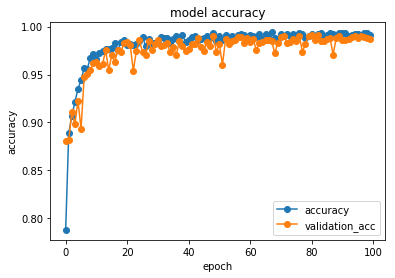

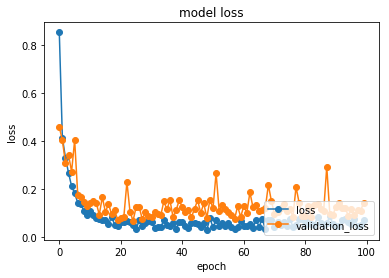

In [11]:
 def build_model():
    # モデルの作成
    model = Sequential()
    # Dense( 出力空間の次元数,,, )
    #model.add(Dense(512, input_shape=(400,) ) )# dense:全結合相
    model.add(Dense(512 ) )# dense:全結合相
    model.add(Activation('relu'))
    model.add(Dropout(0.01))
 
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.01))
 
    model.add(Dense(46))
    model.add(Activation('softmax'))
 
    # 損失関数(どのくらいの誤差があるかを定量化)の定義
    model.compile(
        loss='categorical_crossentropy',#損失関数
        optimizer=Adam(),# 最適化
        metrics=['accuracy'])
    
    return model
 
def plot_history(history):
    # 精度の履歴をプロット
    plt.plot(history.history['acc'],"o-",label="accuracy")
    plt.plot(history.history['val_acc'],"o-",label="validation_acc")
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")
    plt.show()
 
    # 損失の履歴をプロット
    plt.plot(history.history['loss'],"o-",label="loss",)
    plt.plot(history.history['val_loss'],"o-",label="validation_loss")
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='lower right')
    plt.show()
 
if __name__ == "__main__":
    #train_img= np.load("train_img.npy")
    #train_label= np.load("train_label.npy")
    #test_img= np.load("test_img.npy")
    #test_label= np.load("test_label.npy")
    train_img= np.load("train_niti_img.npy")
    train_label= np.load("train_niti_label.npy")
    test_img= np.load("test_niti_img.npy")
    test_label= np.load("test_niti_label.npy")
    
    train_img /=255
    test_img /=255
 
    # データで訓練
    model = build_model()
    history = model.fit(train_img, train_label, 
        nb_epoch=100, #学習させる回数　回数はお好みで　pytyonのnb_epochとはrangeの繰り返しのこと.nb_epoch
        batch_size=32, #無作為に１２８画像取得している。数字はなんでも良い
        validation_data=(test_img, test_label)
    )
 
 
    #学習モデルの保存：kerasはモデルの構造と重みを分けて保存する
    json_string = model.to_json()
    #モデルの構造のファイル名　拡張子.json
    open('OCR_photo_niti.json', 'w').write(json_string)
    #重みファイルの保存 拡張子がhdf5
    model.save_weights('OCR_photo_niti.hdf5')
    model.save('OCR_photo_niti.h5')
    #model.save_weights('OCR_photo.hdf5')
    #model.save('OCR_photo.h5')
 
    
    # モデルの評価を行う
    score = model.evaluate(test_img, test_label, verbose=1)
    print('loss=', score[0])
    print('accuracy=', score[1])
    
    
    predict = model.predict_classes(test_img, batch_size=32)
    print(predict)
    np.save("predict_niti.npy",predict)
    
    # modelに学習させた時の変化の様子をplot
    plot_history(history)
    
    
    #test_model=load_model('OCR_photo.h5')
    #print(model.summary() )
    

# 予測に失敗した画像を取得

In [15]:
print(predict)
np.save("predict.npy",predict)

#test_label(one hot)を整数にする
test_label_N= []
for i in test_label:
    Tuple= np.where(i==1)
    N= int( Tuple[0] )
    test_label_N.append(N)


# 精度の確認,予測失敗画像のindexを取得
n=0#間違えてる個数
N=0#index
incorrect_N= []
incorrect_label= []
for p,y in zip( predict,test_label_N ):
    p=int(p)
    y=int(y)
    if p!=y:
        n+=1
        incorrect_N.append(N)
        incorrect_label.append(y)
    N+=1
print("n=",n)
print("accuracy= ", 1-n/len(test_label) )# 精度の確認
print("incorrect_N=",incorrect_N )
print("incorrect_label=",incorrect_label )

print( dic[incorrect_label[0]] )

# 不正解画像ベクトルを集める
incorrect_img= np.zeros( [0,1600] )
for i in incorrect_N:
    incorrect_img= np.insert( incorrect_img, len(incorrect_img), test_img[i], axis=0 )
print("incorrect_img=",incorrect_img.shape )

[27 10 26 ...  2 32 21]
n= 176
accuracy=  0.9885862516212711
incorrect_N= [78, 83, 249, 267, 584, 693, 786, 836, 1033, 1132, 1198, 1361, 1399, 1504, 1540, 1625, 1662, 2078, 2083, 2092, 2124, 2248, 2368, 2423, 2433, 2455, 2459, 2500, 2546, 2578, 2869, 2923, 3007, 3072, 3168, 3250, 3331, 3389, 3411, 3452, 3470, 3514, 3607, 3653, 3743, 3831, 3846, 3922, 4008, 4182, 4190, 4461, 4510, 4514, 4592, 4762, 4911, 4991, 5050, 5112, 5137, 5157, 5416, 5482, 5597, 5726, 5836, 6049, 6093, 6211, 6299, 6466, 6472, 6548, 6971, 7160, 7387, 7467, 7886, 7932, 7958, 8066, 8110, 8137, 8252, 8262, 8284, 8391, 8545, 8818, 9001, 9024, 9119, 9133, 9356, 9435, 9440, 9477, 9507, 9521, 9533, 9557, 9686, 9699, 9753, 9772, 9792, 9796, 9882, 9886, 9942, 10035, 10069, 10236, 10316, 10344, 10357, 10369, 10437, 10489, 10544, 10573, 10597, 10628, 10670, 10700, 11124, 11410, 11810, 11953, 12189, 12221, 12240, 12276, 12395, 12464, 12477, 12648, 12771, 12805, 12870, 12995, 13068, 13090, 13203, 13216, 13267, 13276, 13565, 136

# 分類失敗画像の表示

/home/sugawaramisaki/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

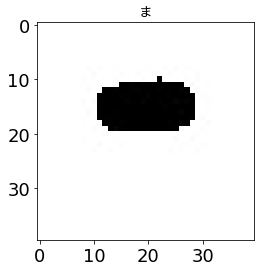

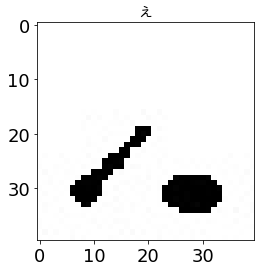

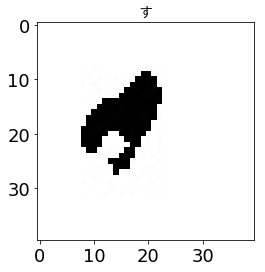

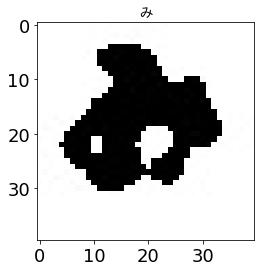

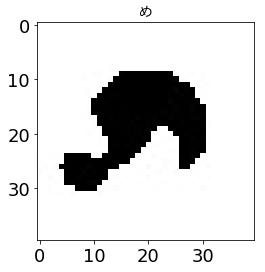

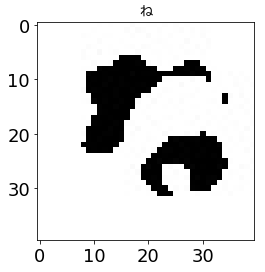

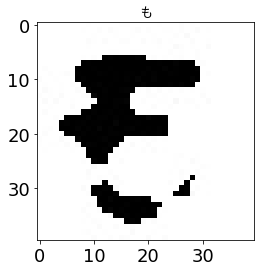

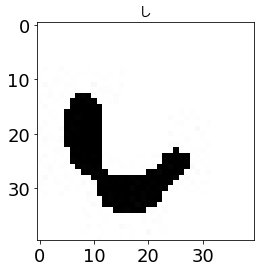

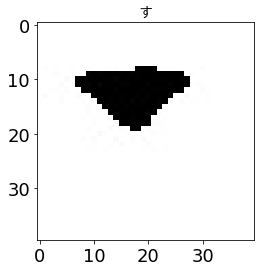

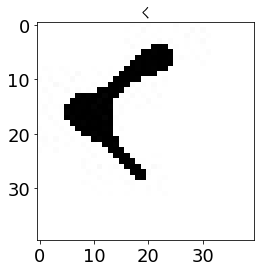

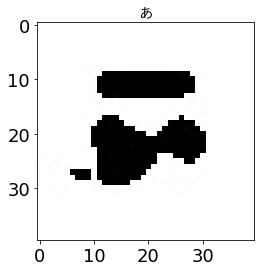

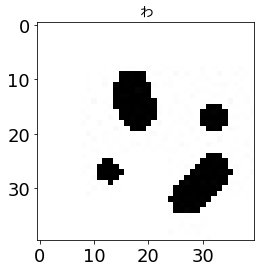

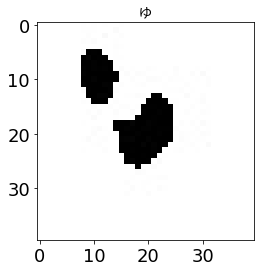

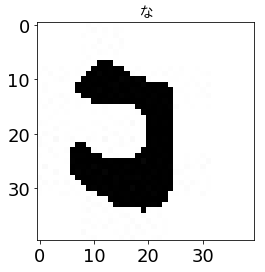

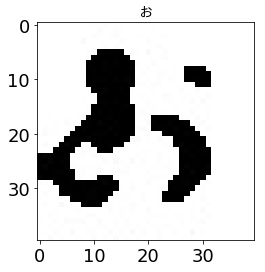

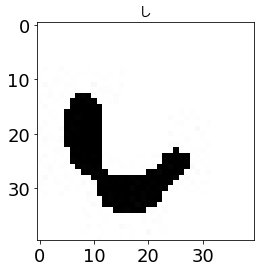

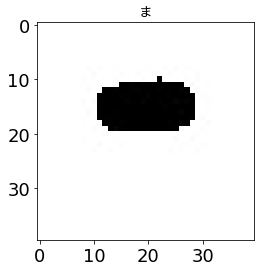

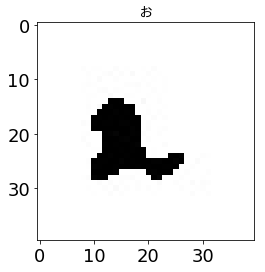

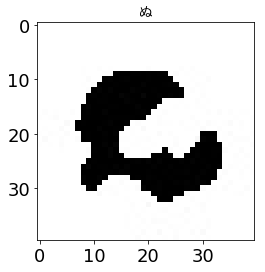

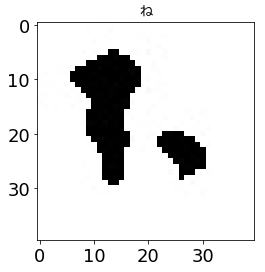

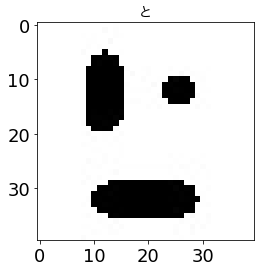

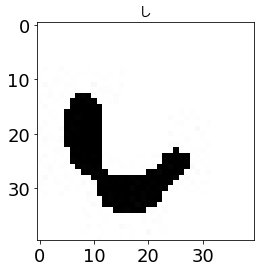

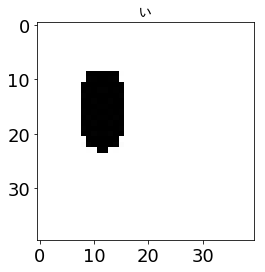

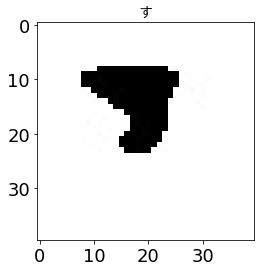

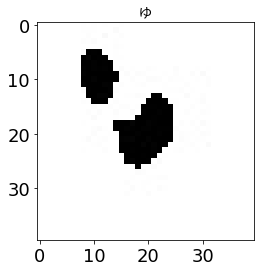

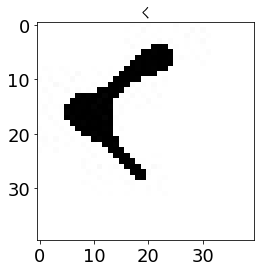

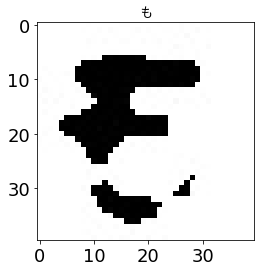

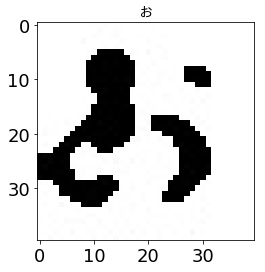

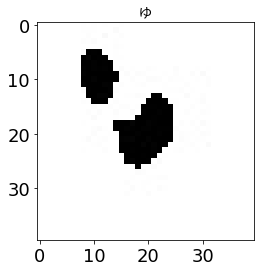

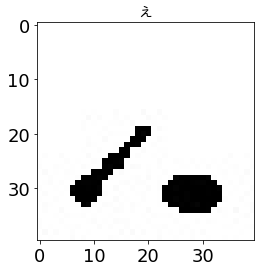

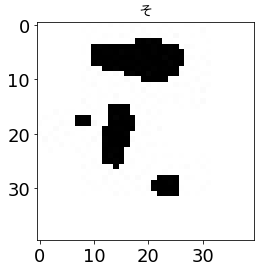

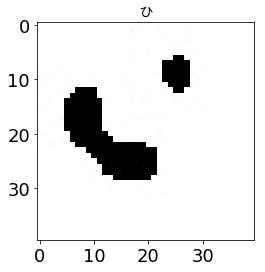

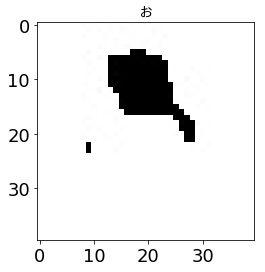

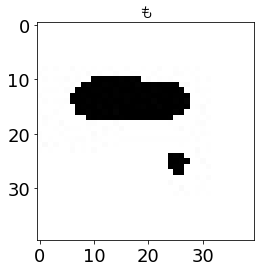

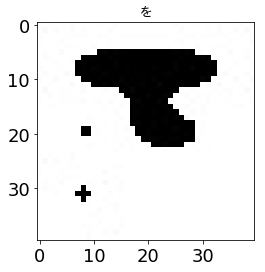

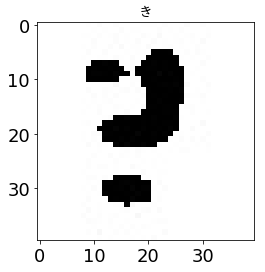

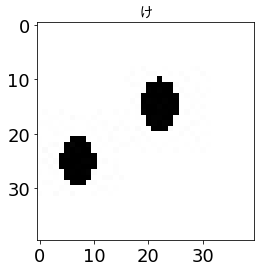

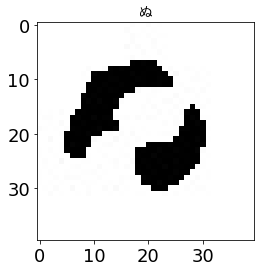

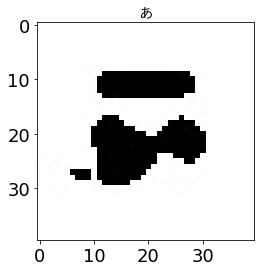

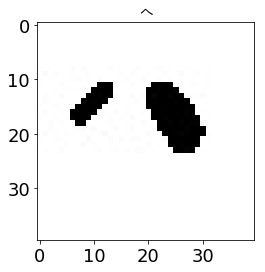

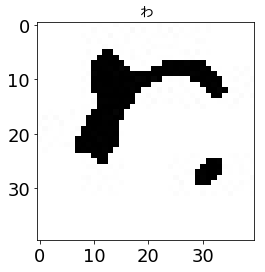

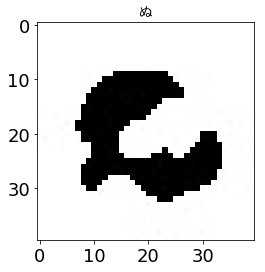

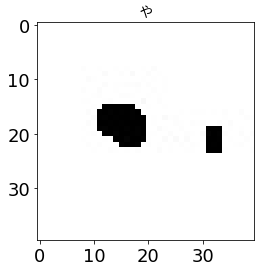

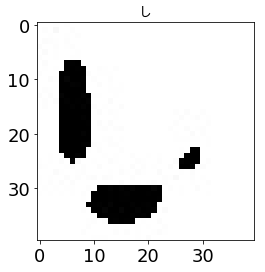

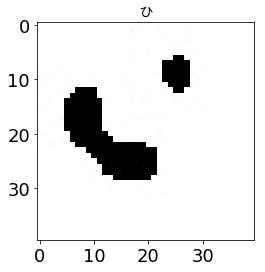

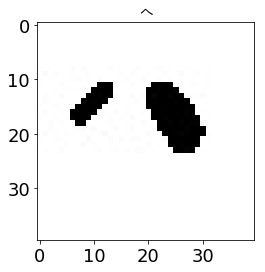

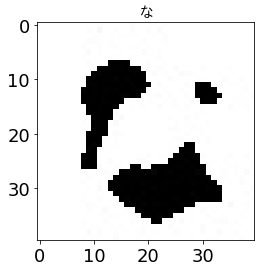

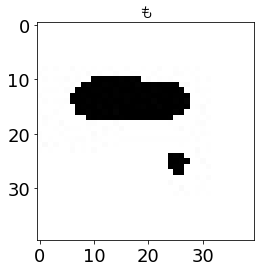

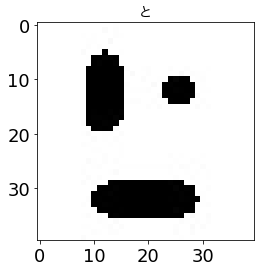

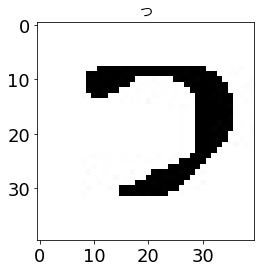

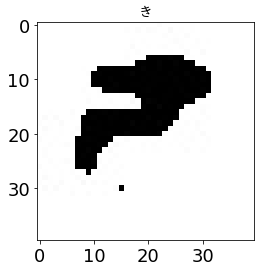

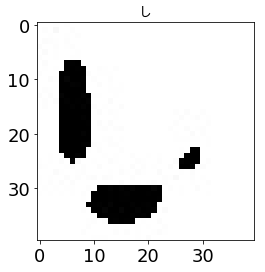

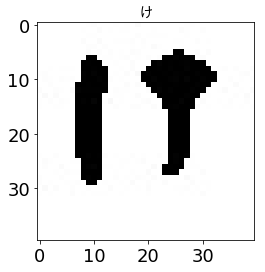

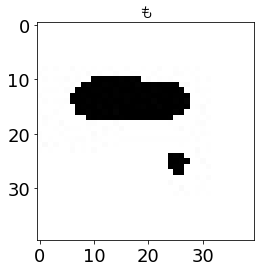

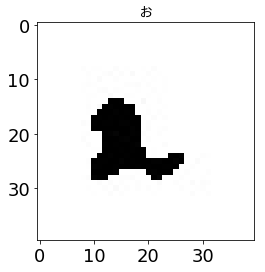

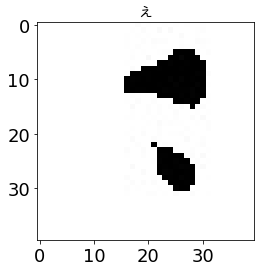

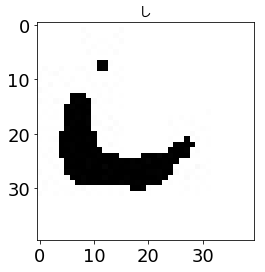

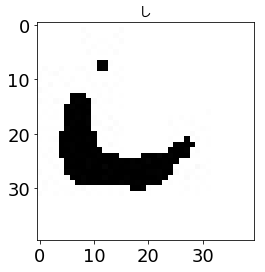

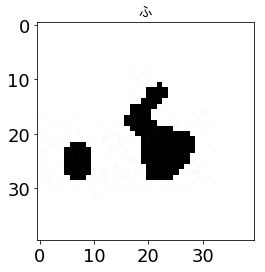

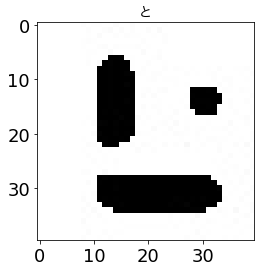

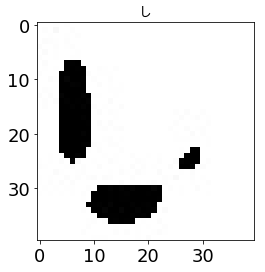

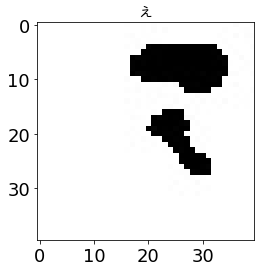

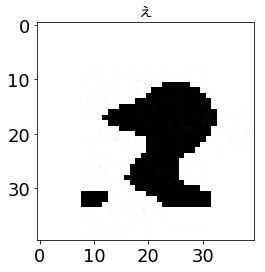

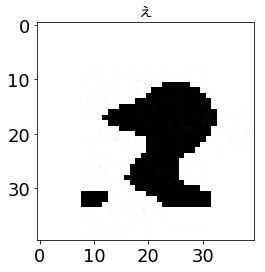

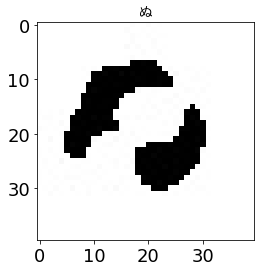

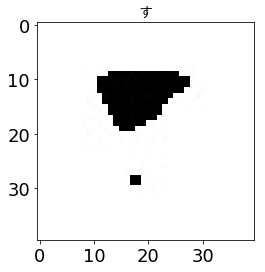

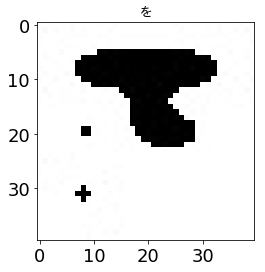

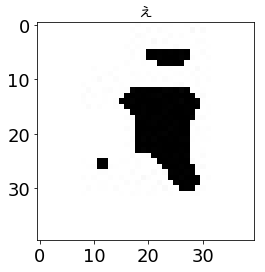

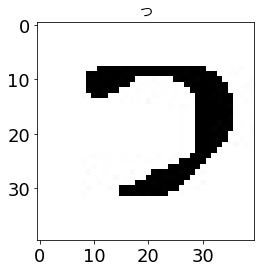

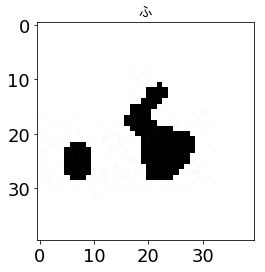

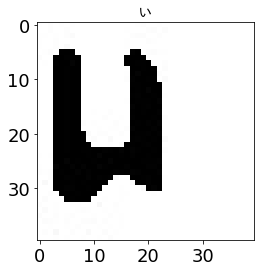

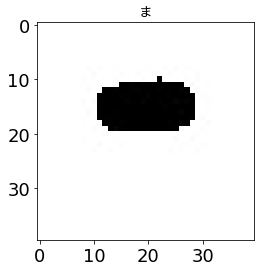

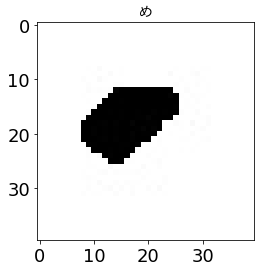

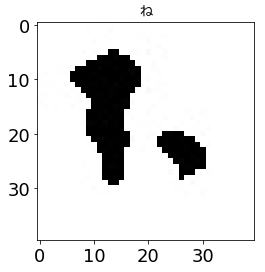

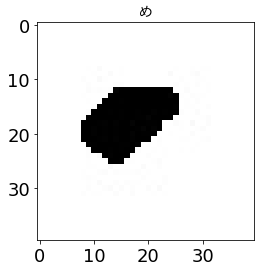

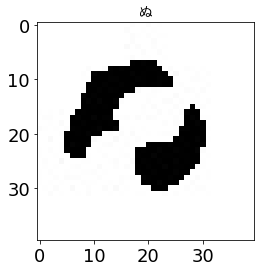

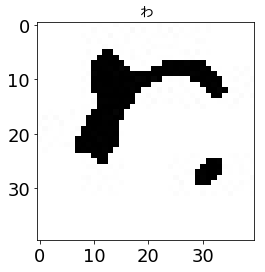

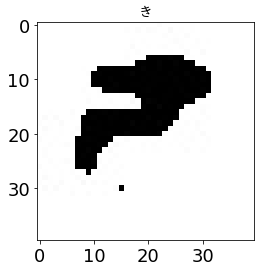

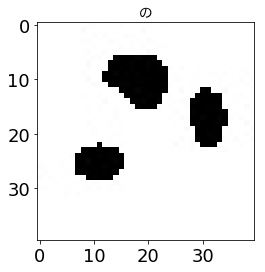

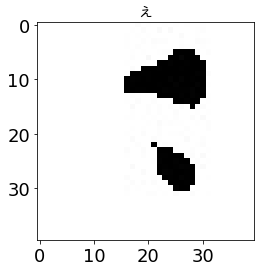

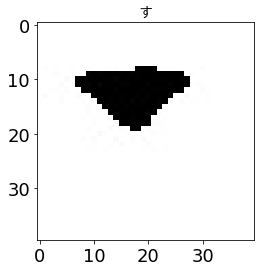

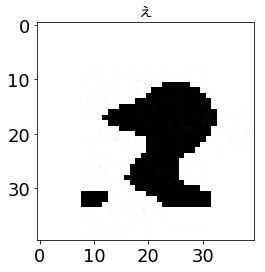

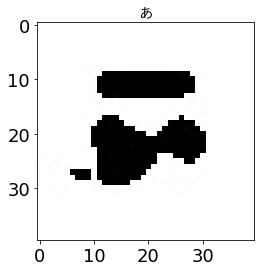

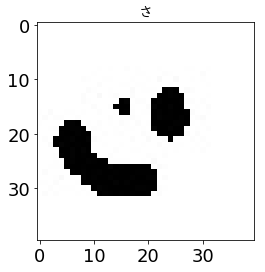

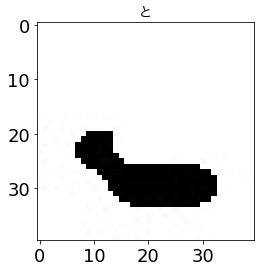

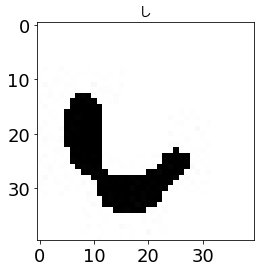

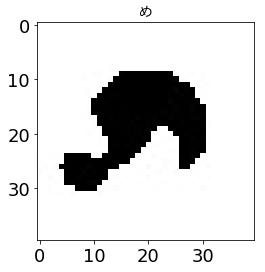

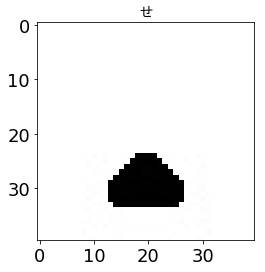

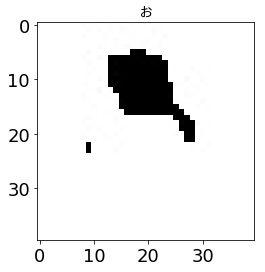

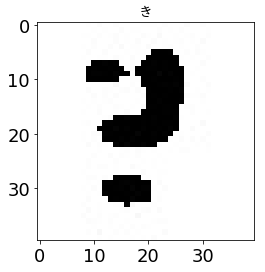

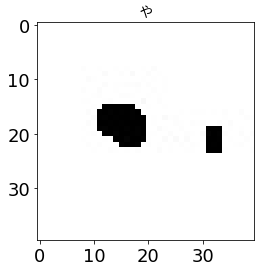

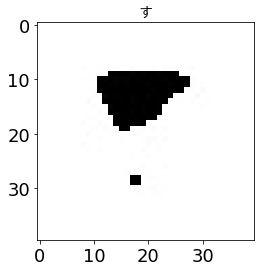

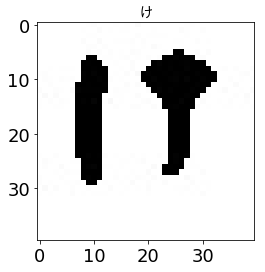

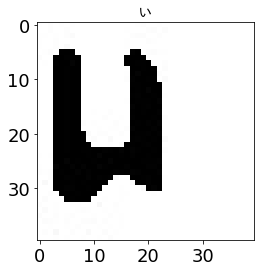

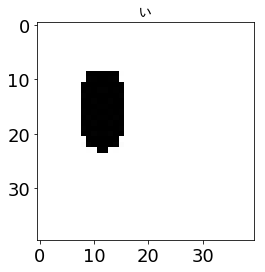

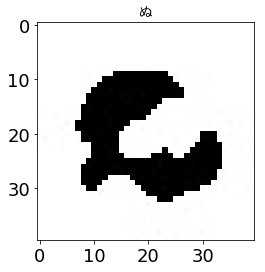

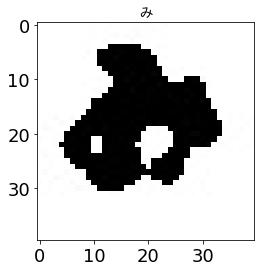

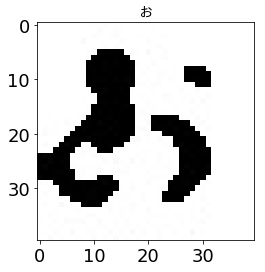

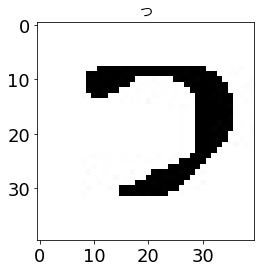

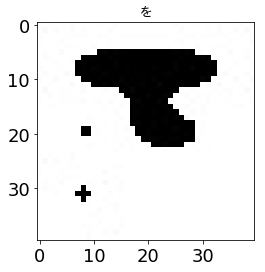

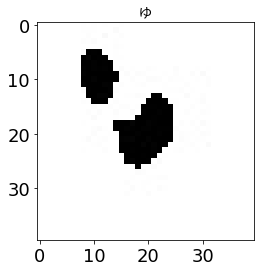

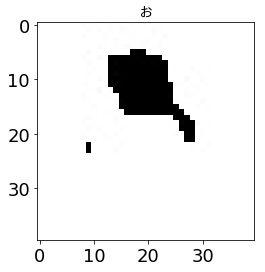

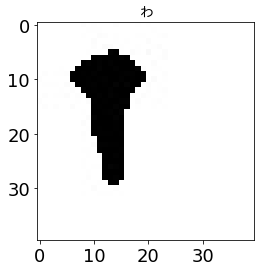

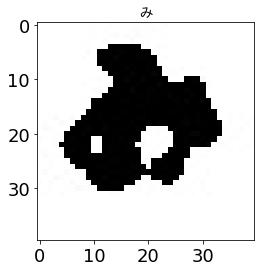

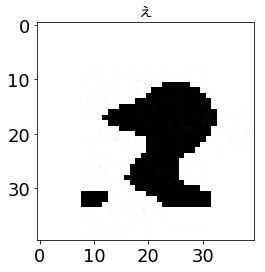

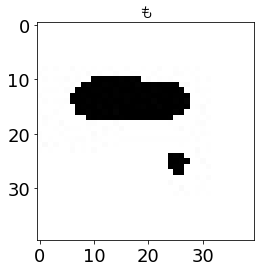

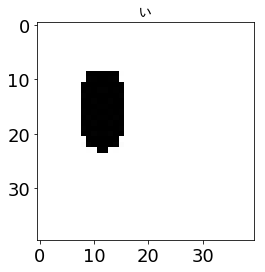

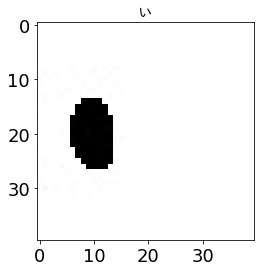

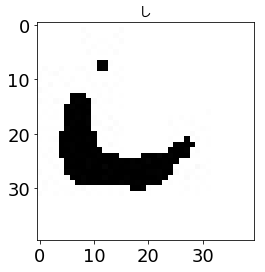

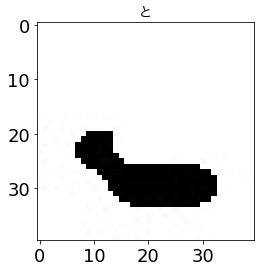

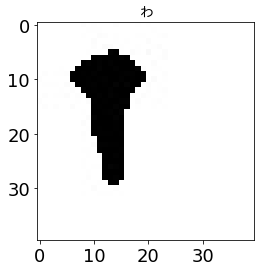

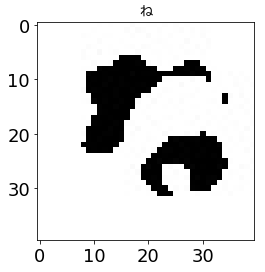

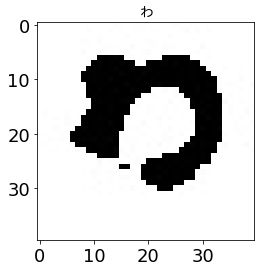

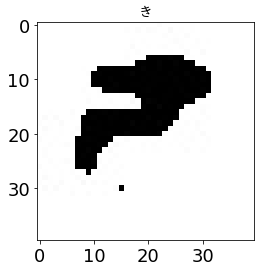

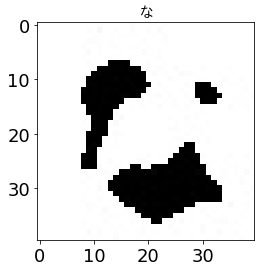

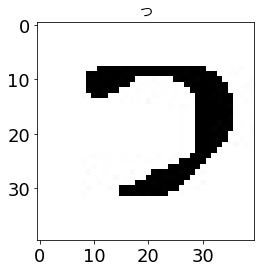

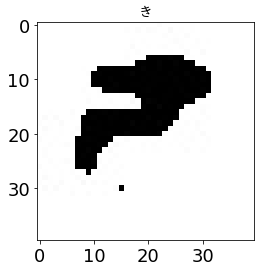

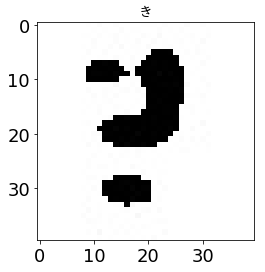

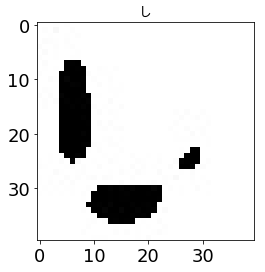

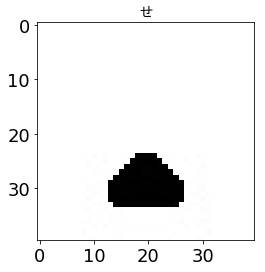

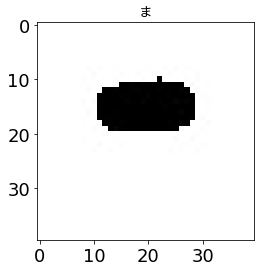

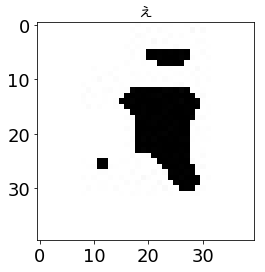

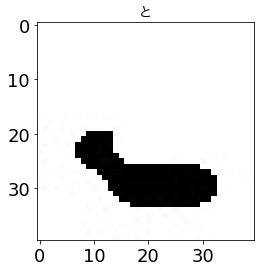

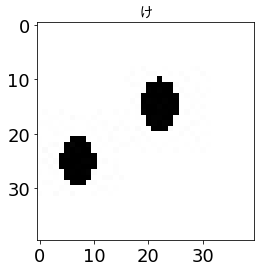

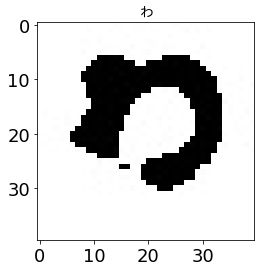

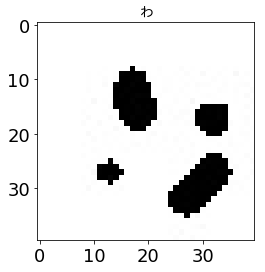

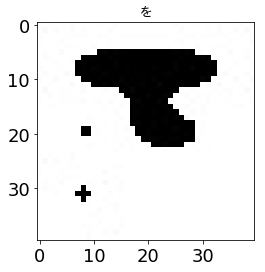

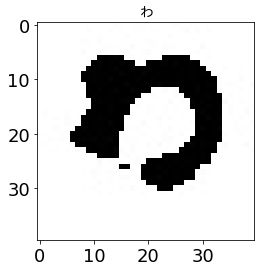

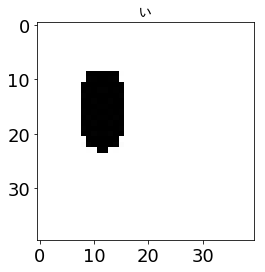

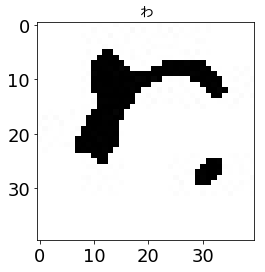

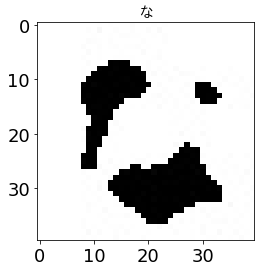

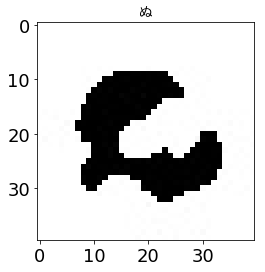

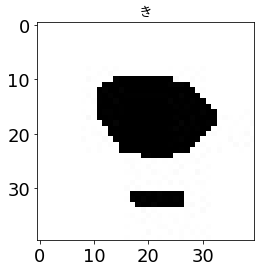

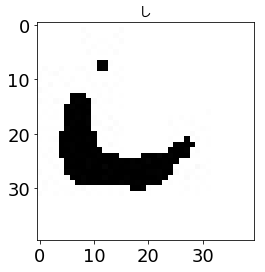

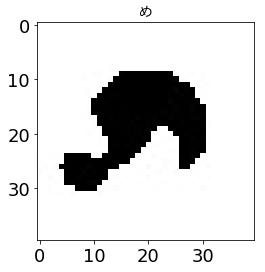

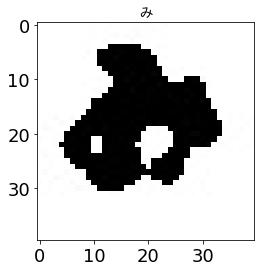

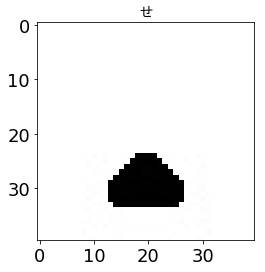

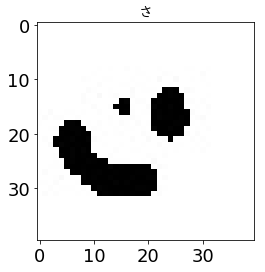

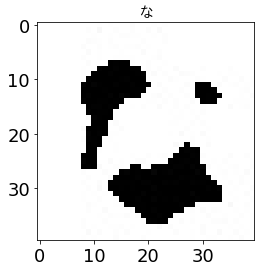

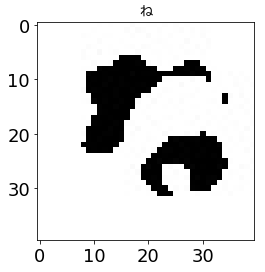

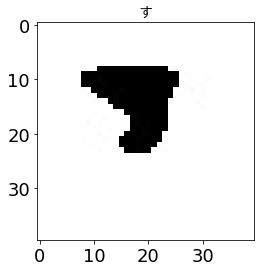

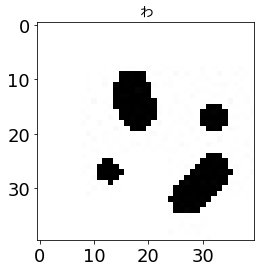

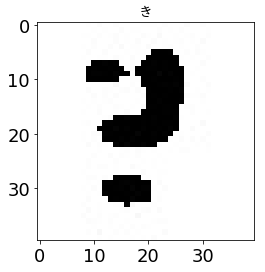

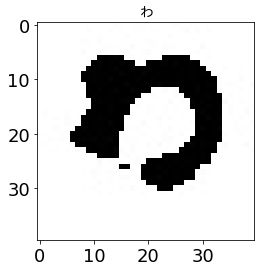

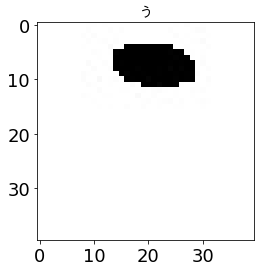

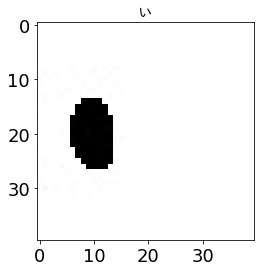

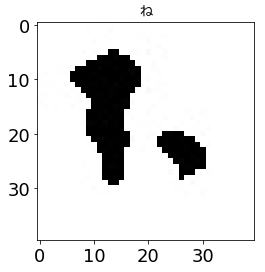

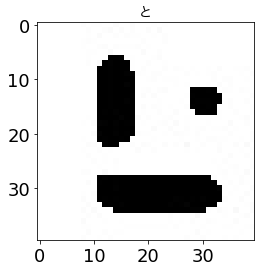

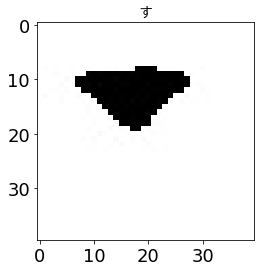

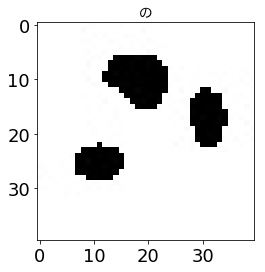

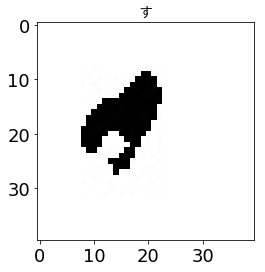

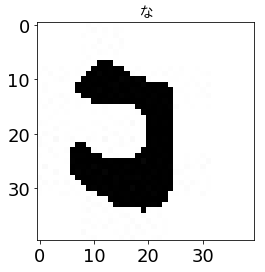

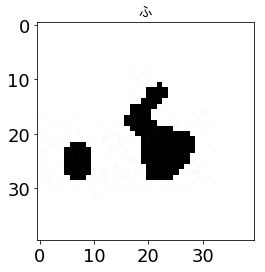

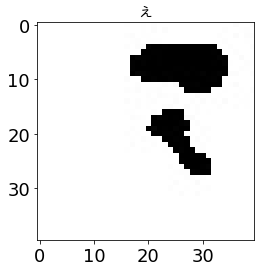

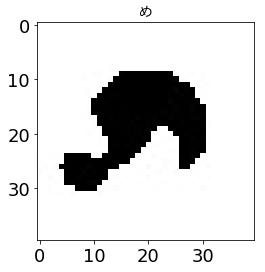

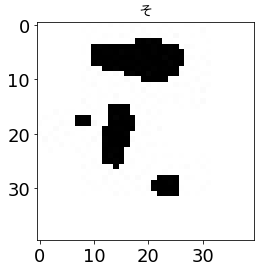

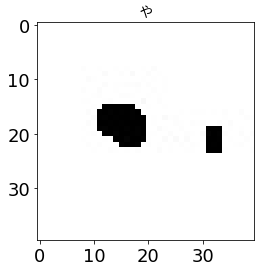

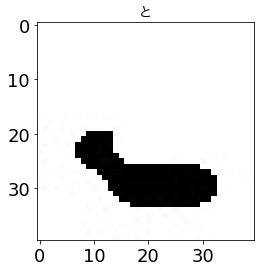

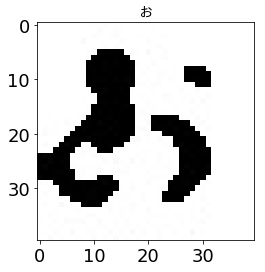

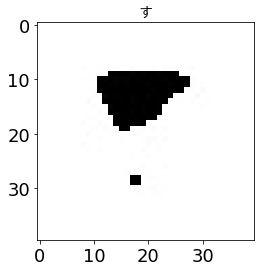

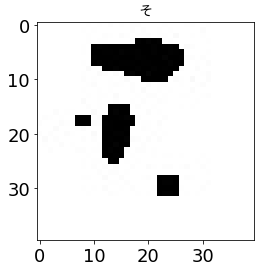

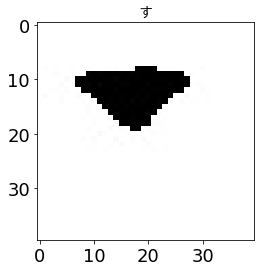

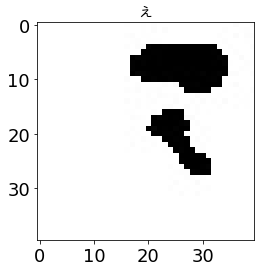

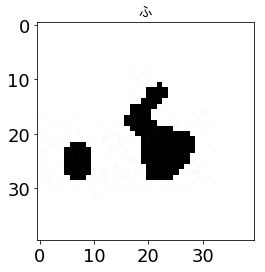

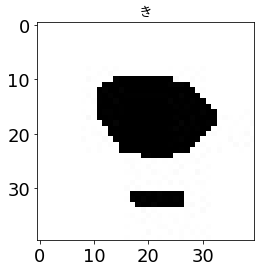

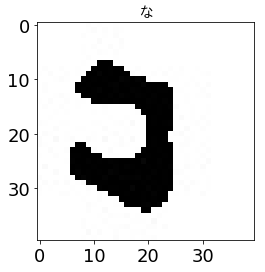

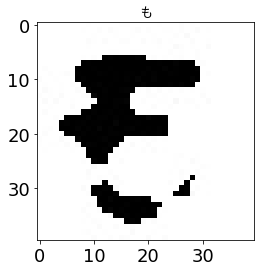

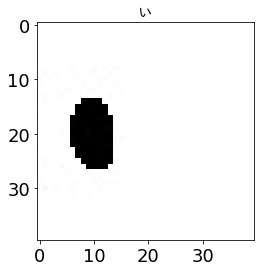

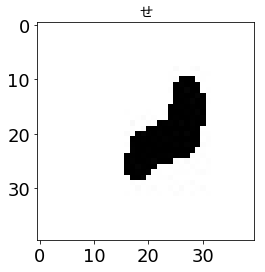

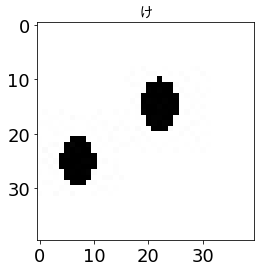

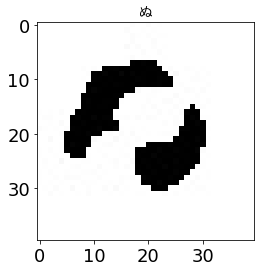

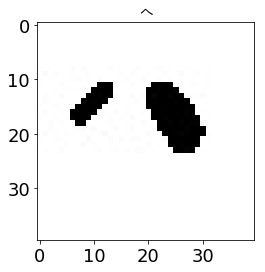

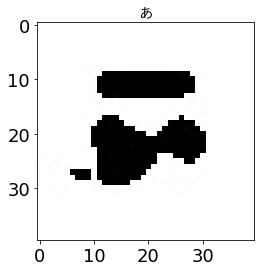

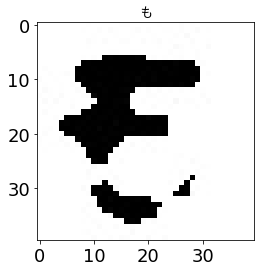

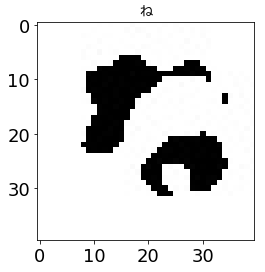

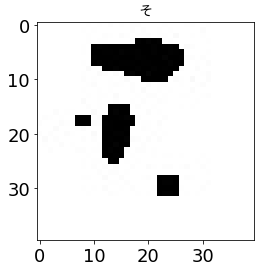

In [28]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf', size=14)

plt.gray(  )
for n,i,l in zip(incorrect_N,incorrect_img,incorrect_label ):
    if n%1==0:
        i=np.reshape( i,(40,40) )
        plt.figure( figsize=(4,4) )
        plt.rcParams["font.size"]=18
        plt.title( dic[l], fontproperties=fp )
        plt.imshow(i)

# グラフの作成

c=  Counter({29: 13, 41: 12, 14: 12, 16: 11, 4: 10, 35: 9, 7: 9, 38: 8, 25: 8, 44: 8, 39: 7, 10: 7, 27: 6, 23: 5, 1: 4, 30: 4, 20: 4, 19: 4, 34: 4, 32: 4, 3: 4, 26: 4, 15: 4, 0: 3, 12: 3, 13: 2, 24: 2, 37: 2, 11: 2, 17: 1})
keys= dict_keys([1, 29, 16, 30, 27, 39, 38, 41, 13, 20, 14, 19, 10, 35, 25, 44, 7, 34, 24, 32, 4, 23, 0, 12, 3, 26, 37, 11, 15, 17])
keys= ['ま', 'え', 'す', 'み', 'め', 'ね', 'も', 'し', 'く', 'あ', 'わ', 'ゆ', 'な', 'お', 'ぬ', 'と', 'い', 'そ', 'ひ', 'を', 'き', 'け', 'へ', 'や', 'つ', 'ふ', 'の', 'さ', 'せ', 'う']
val= dict_values([4, 13, 11, 4, 6, 7, 8, 12, 2, 4, 12, 4, 7, 9, 8, 8, 9, 4, 2, 4, 10, 5, 3, 3, 4, 4, 2, 2, 4, 1])


([<matplotlib.axis.XTick at 0x7f8971ec8198>,
 <a list of 30 Text xticklabel objects>)

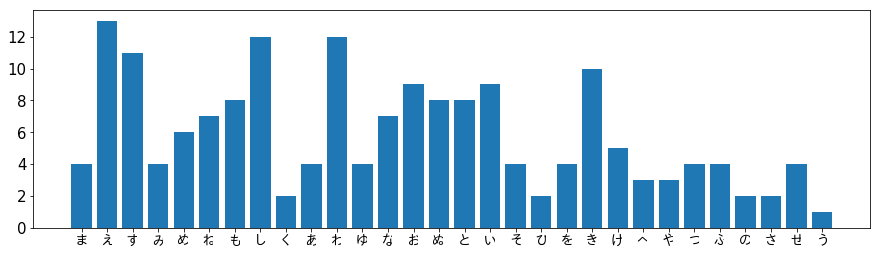

In [51]:
import collections
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf', size=14)

c= collections.Counter( incorrect_label )
print( "c= ",c )

keys= c.keys()
print("keys=",keys)
keys=list(keys)
for i in range( len(keys) ):
    keys[i]=dic[ keys[i] ]
print("keys=",keys)    


val= c.values()
print("val=",val)

#name=range(46)
#name= [1,2,3,4,5,6,7,8,9,10]
#print("name=",name)
plt.rcParams["font.size"] = 15
plt.figure(figsize=(15,4) )
plt.bar(keys, val, align="center" )
#plt.bar(name, val, align="center", tick_label= val )
plt.xticks(keys, fontproperties=fp)

# 分類成功画像の取得

In [29]:
# 成功画像のindexを取得
n=0#間違えてる個数
N=0#index
correct_index= []
correct_label= []
for p,y in zip( predict,test_label_N ):
    p=int(p)
    y=int(y)
    if p==y:
        n+=1
        correct_index.append(N)
        correct_label.append(y)
    N+=1
print("n=",n)
print("accuracy= ", n/len(test_label) )# 精度の確認
print("correct_index=",len(correct_index) )
print("correct_label=", correct_label)


# 成功画像ベクトル集を作成
correct_img= np.zeros( [0,1600] )
for i in correct_index:
    correct_img= np.insert( correct_img, len(correct_img), test_img[i], axis=0 )
print("correct_img=",correct_img.shape)


n= 15244
accuracy=  0.9885862516212711
correct_index= 15244
correct_label= [27, 10, 26, 42, 34, 26, 10, 34, 39, 10, 21, 11, 25, 8, 32, 41, 23, 3, 3, 4, 30, 26, 38, 8, 38, 26, 39, 31, 24, 34, 26, 41, 2, 31, 38, 32, 0, 12, 19, 0, 37, 27, 25, 26, 33, 45, 2, 27, 34, 24, 39, 31, 5, 34, 29, 1, 15, 2, 18, 16, 7, 41, 7, 37, 27, 43, 36, 39, 24, 33, 10, 12, 28, 19, 40, 13, 1, 38, 1, 22, 28, 27, 14, 37, 21, 26, 17, 45, 34, 23, 6, 13, 42, 24, 32, 0, 10, 29, 17, 3, 7, 3, 39, 18, 4, 0, 21, 39, 26, 34, 12, 18, 12, 24, 30, 13, 32, 6, 10, 44, 16, 16, 29, 14, 24, 13, 28, 32, 4, 45, 19, 33, 18, 36, 32, 33, 34, 33, 31, 39, 15, 9, 21, 13, 29, 37, 41, 2, 45, 12, 30, 32, 29, 25, 9, 19, 14, 16, 25, 24, 19, 22, 4, 9, 34, 29, 34, 7, 2, 7, 22, 8, 20, 26, 14, 9, 40, 9, 42, 15, 35, 34, 5, 16, 18, 16, 27, 45, 22, 6, 20, 16, 6, 9, 34, 33, 15, 36, 1, 42, 10, 31, 9, 11, 16, 41, 8, 18, 36, 16, 21, 26, 35, 13, 8, 4, 19, 0, 5, 30, 27, 3, 3, 29, 19, 13, 13, 44, 15, 7, 44, 44, 13, 31, 39, 13, 14, 17, 33, 34, 12, 44, 28, 22

correct_img= (15244, 1600)


# 分類成功画像の表示

/home/sugawaramisaki/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


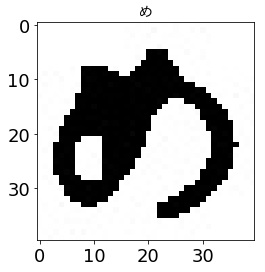

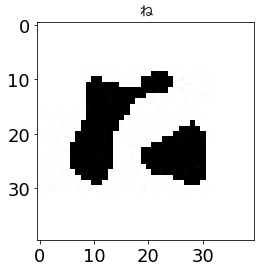

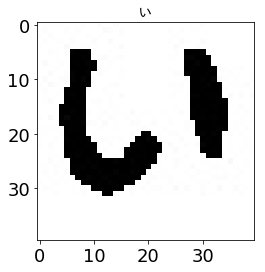

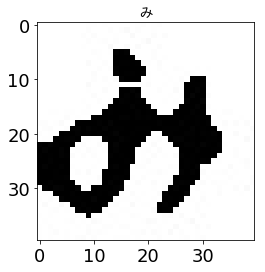

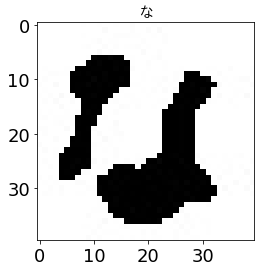

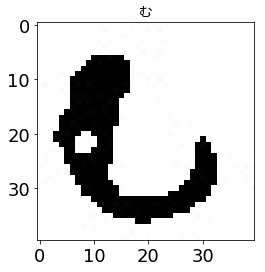

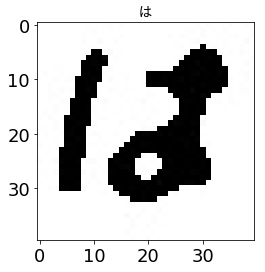

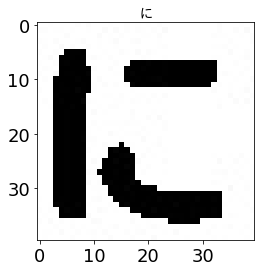

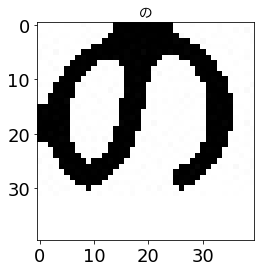

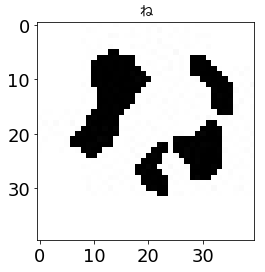

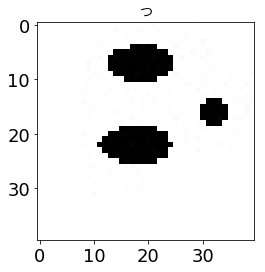

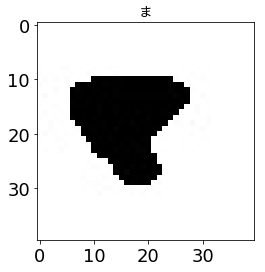

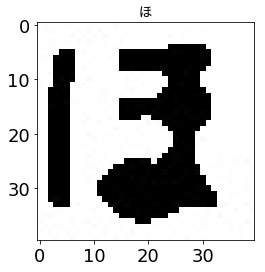

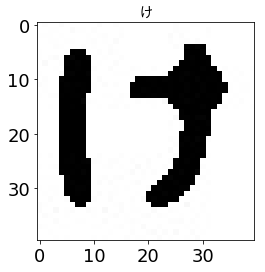

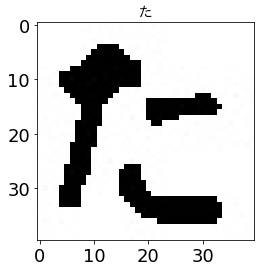

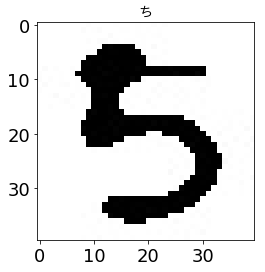

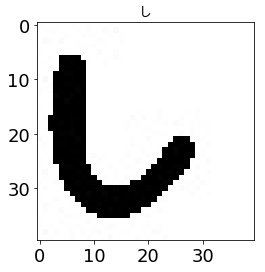

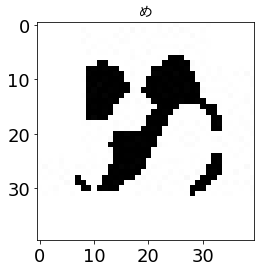

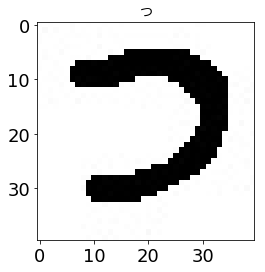

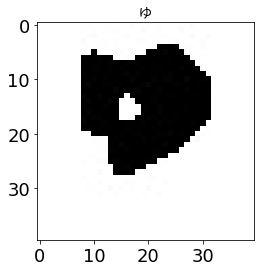

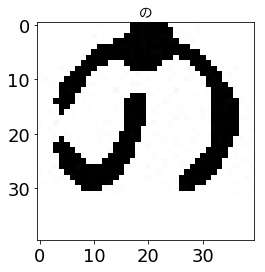

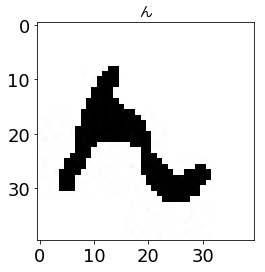

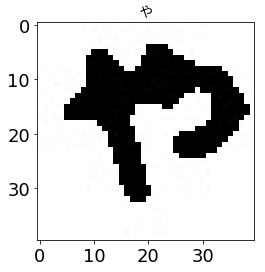

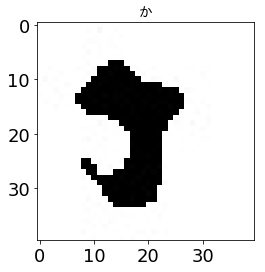

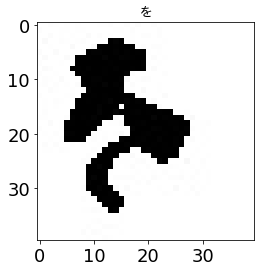

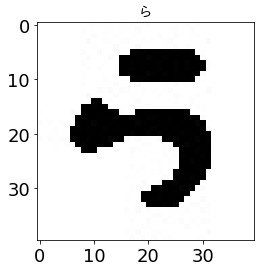

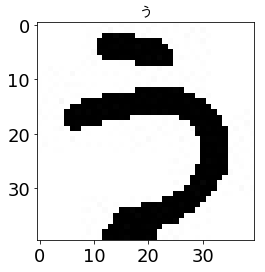

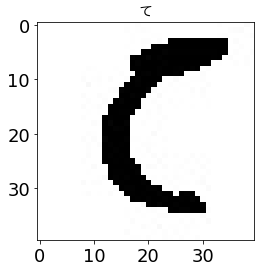

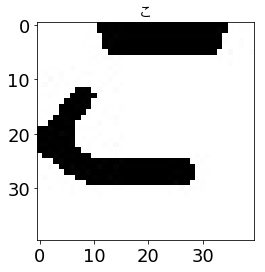

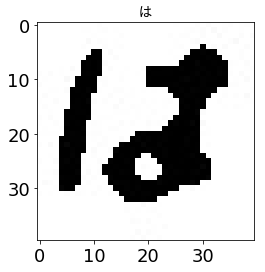

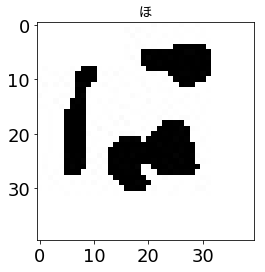

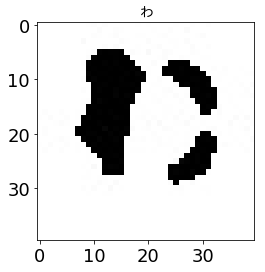

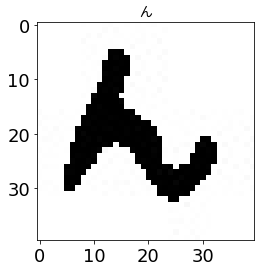

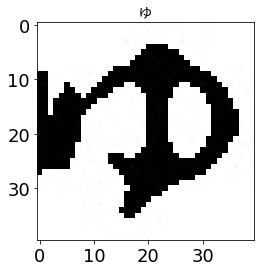

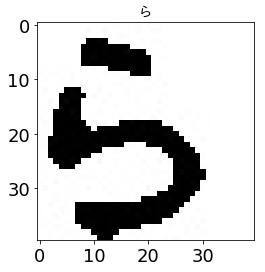

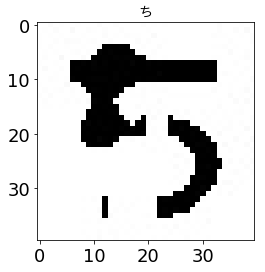

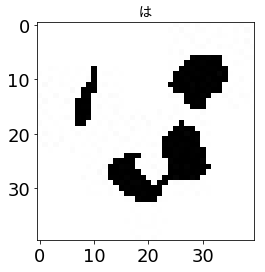

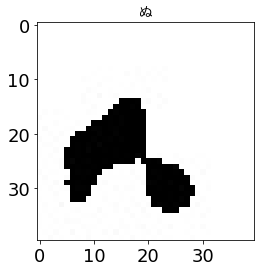

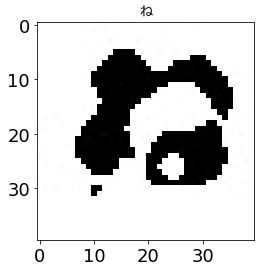

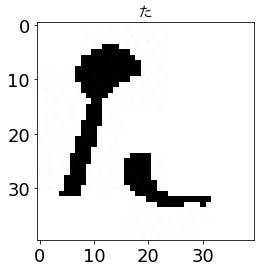

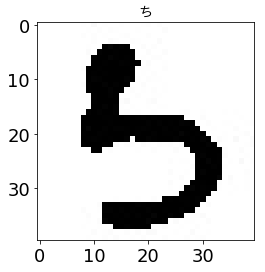

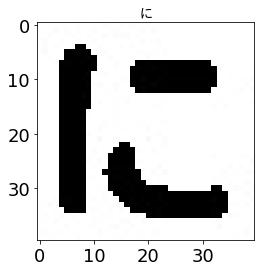

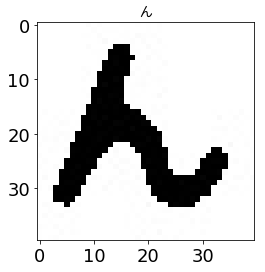

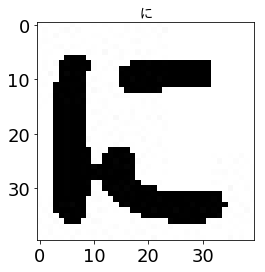

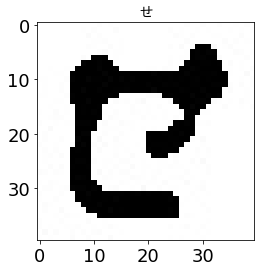

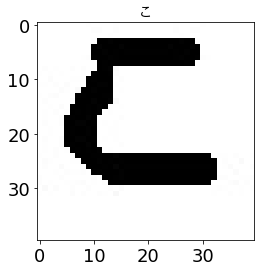

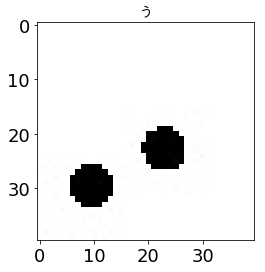

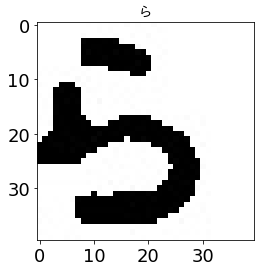

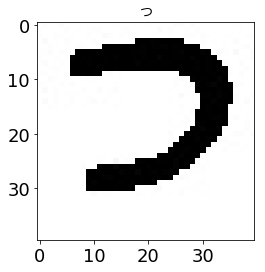

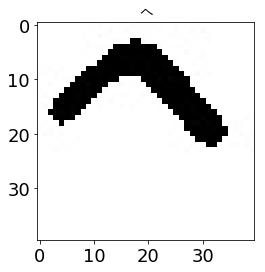

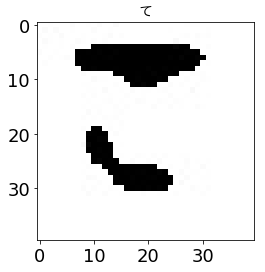

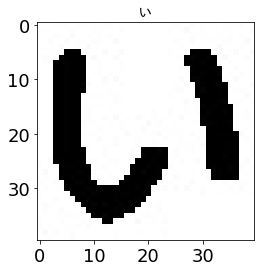

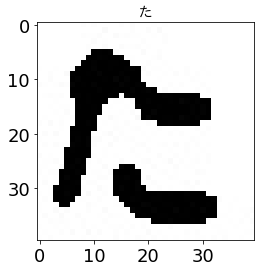

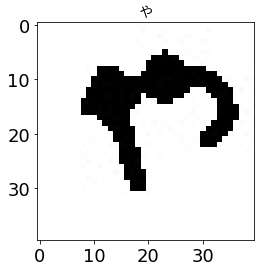

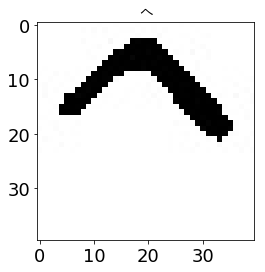

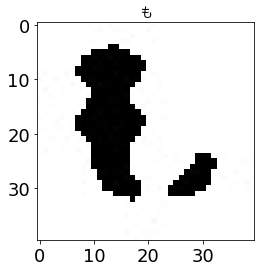

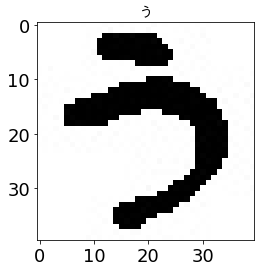

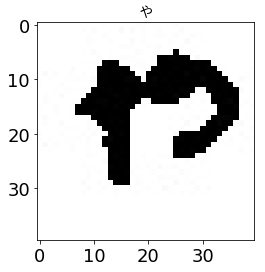

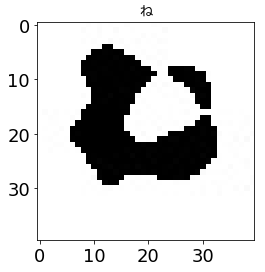

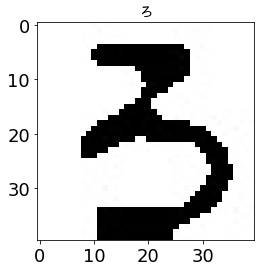

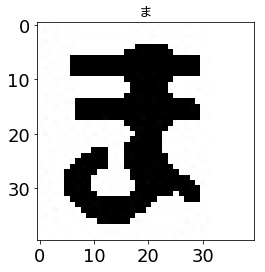

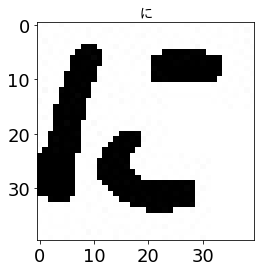

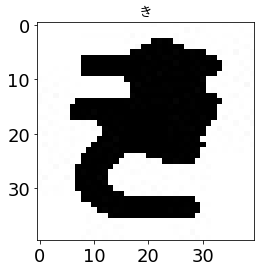

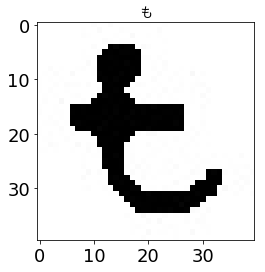

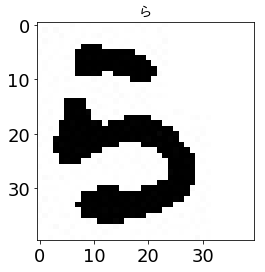

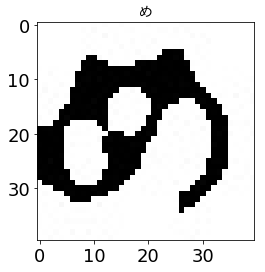

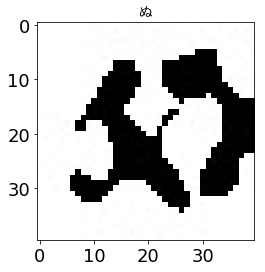

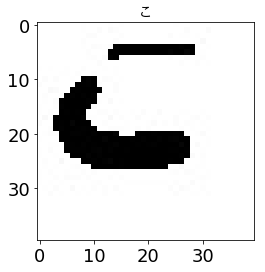

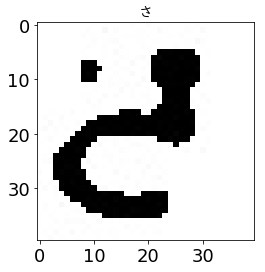

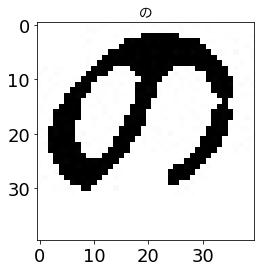

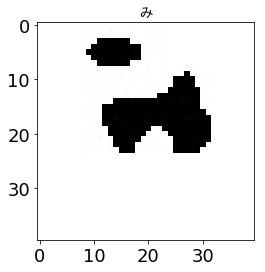

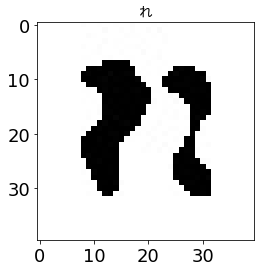

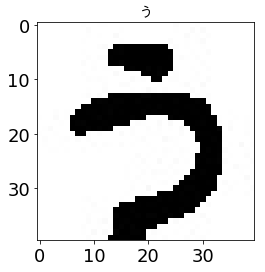

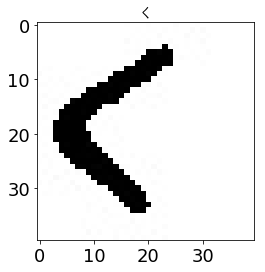

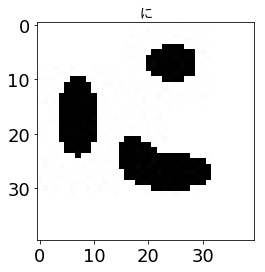

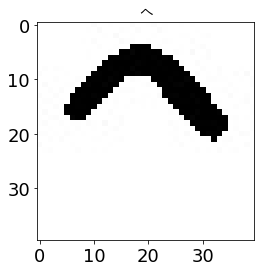

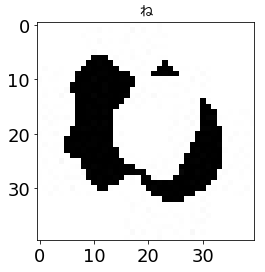

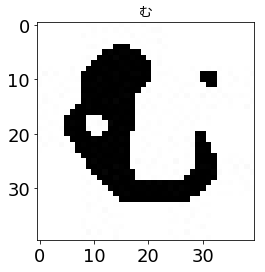

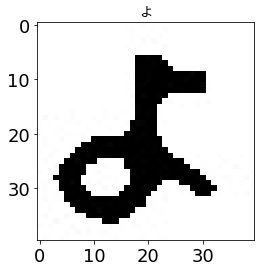

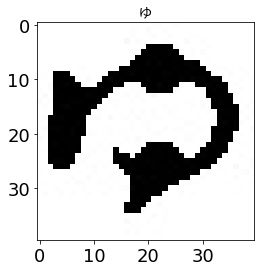

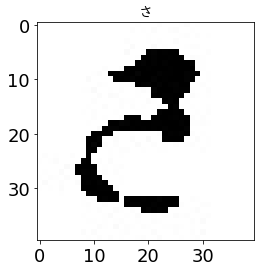

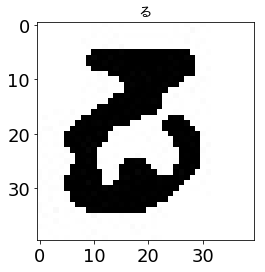

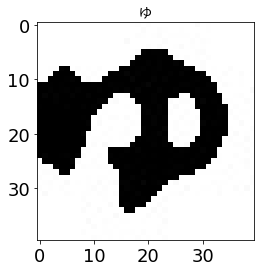

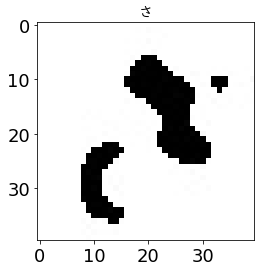

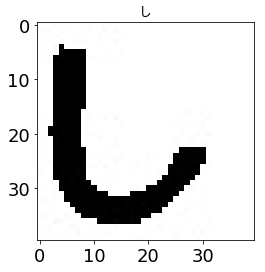

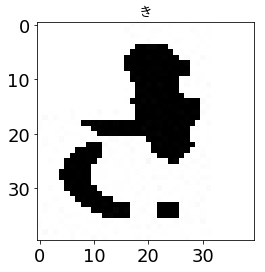

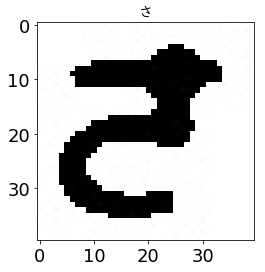

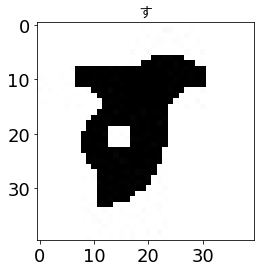

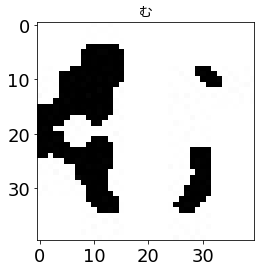

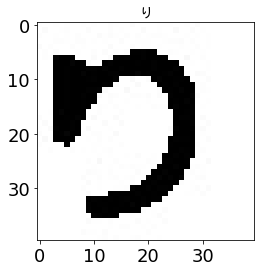

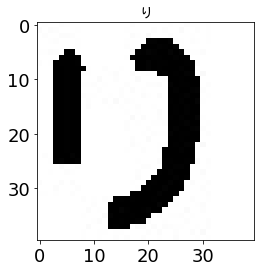

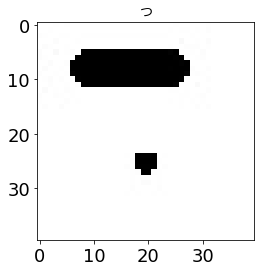

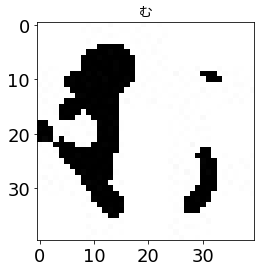

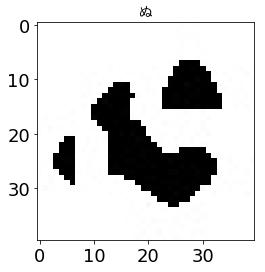

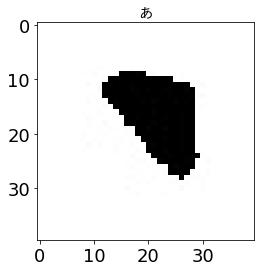

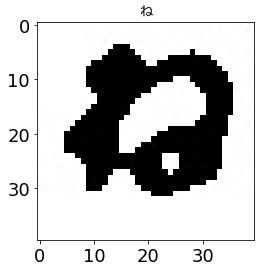

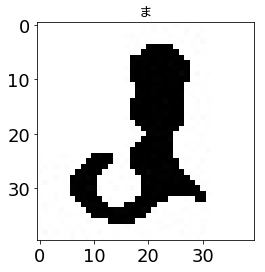

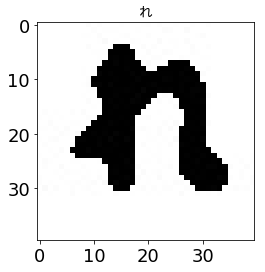

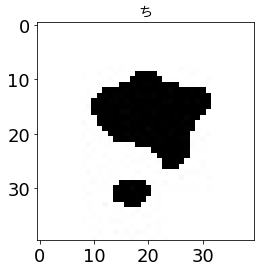

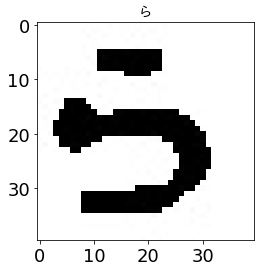

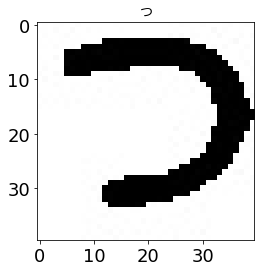

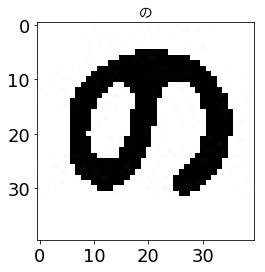

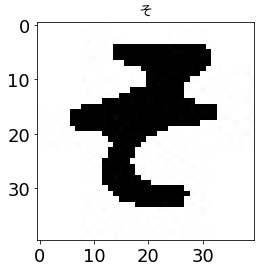

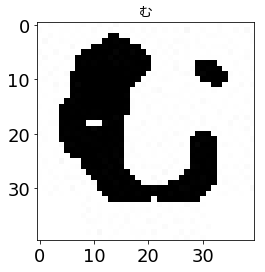

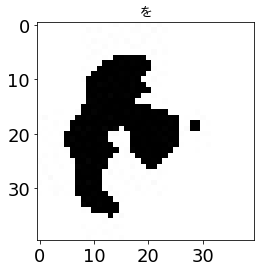

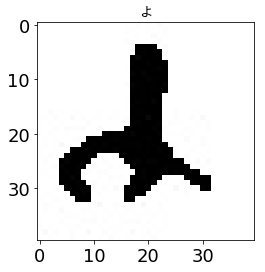

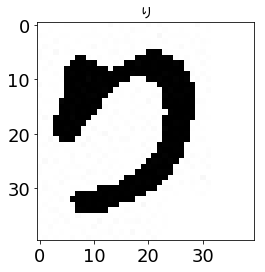

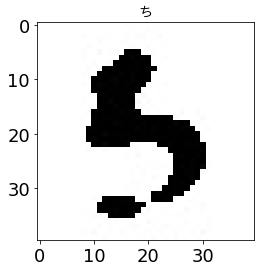

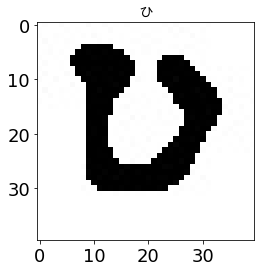

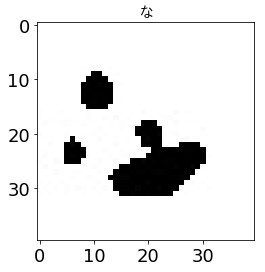

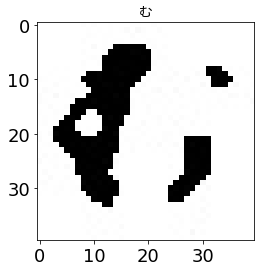

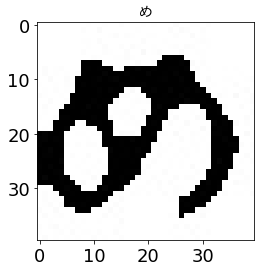

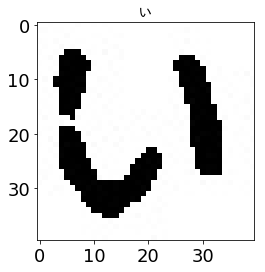

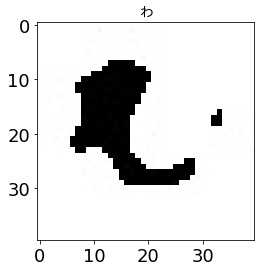

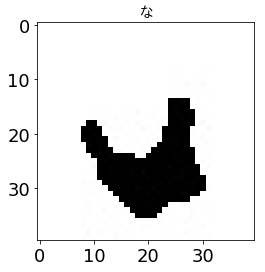

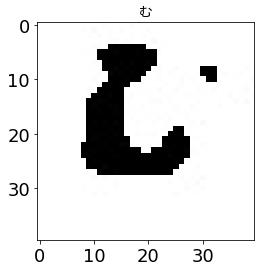

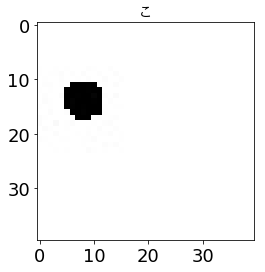

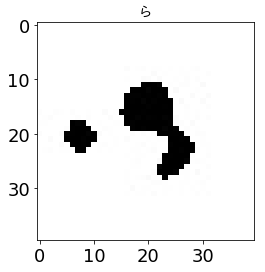

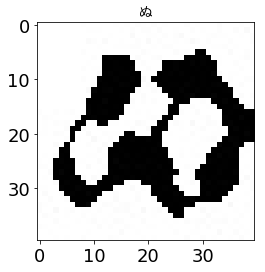

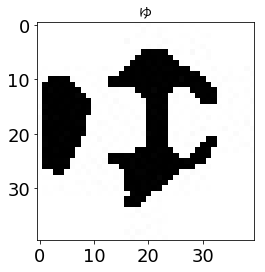

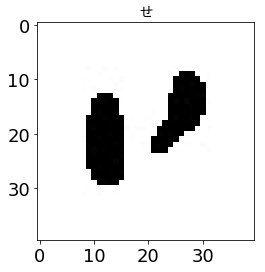

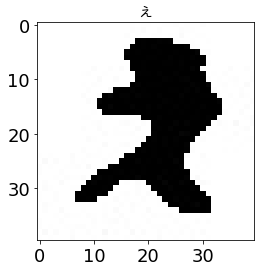

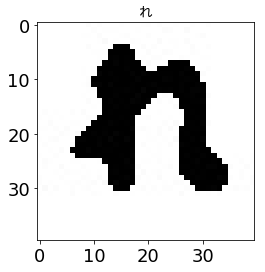

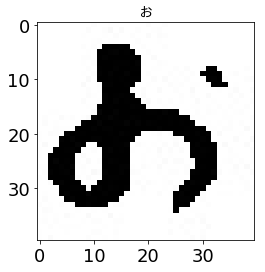

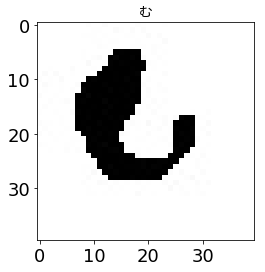

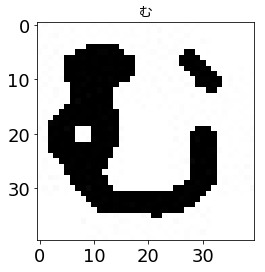

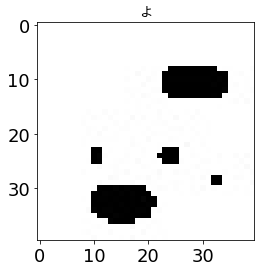

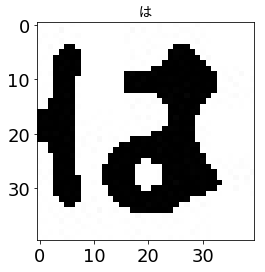

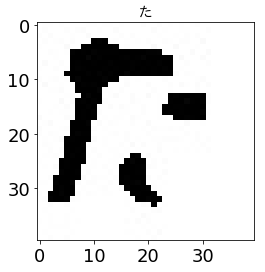

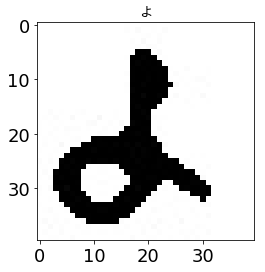

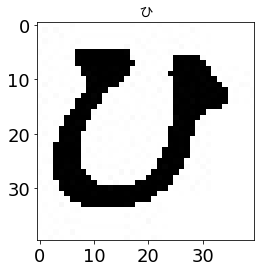

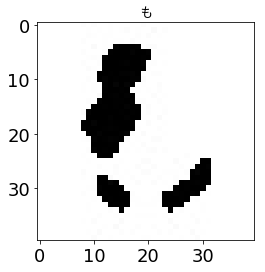

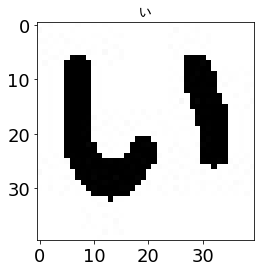

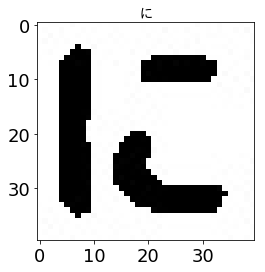

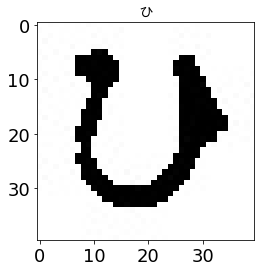

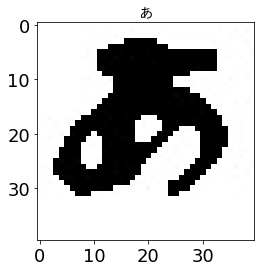

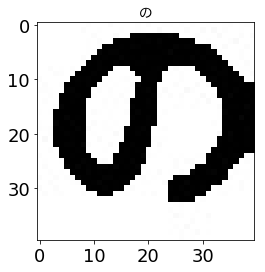

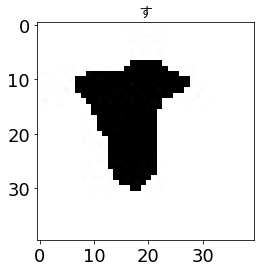

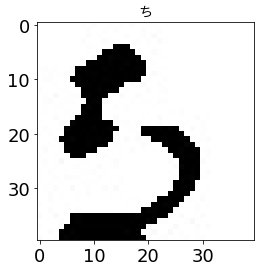

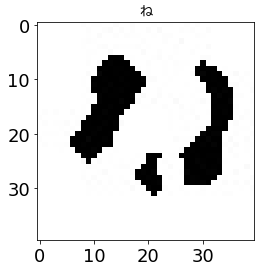

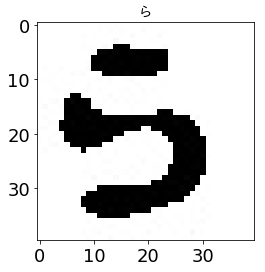

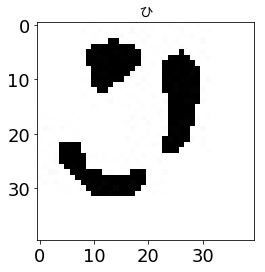

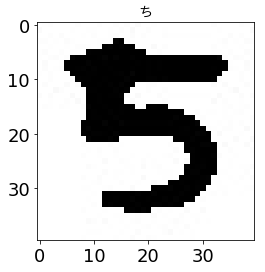

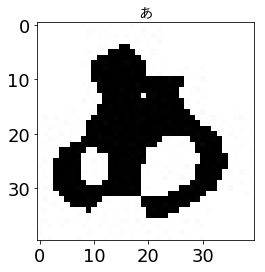

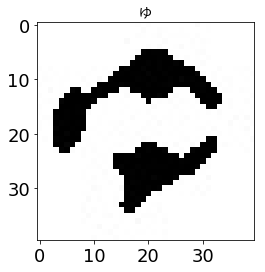

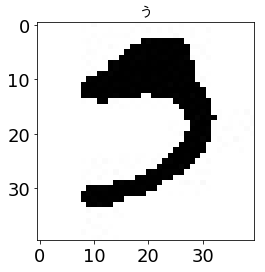

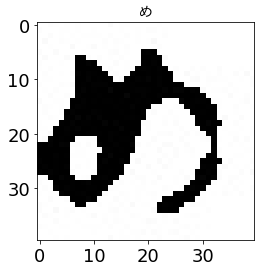

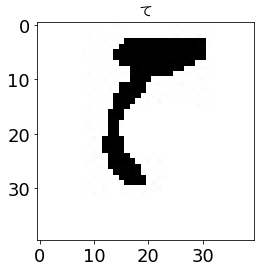

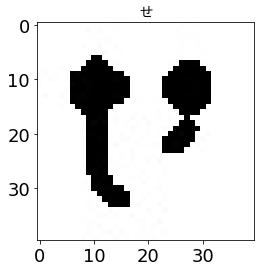

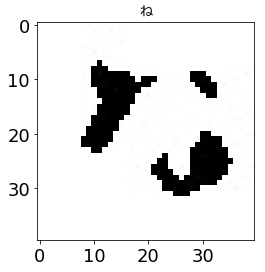

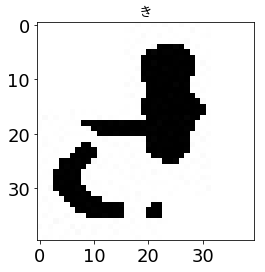

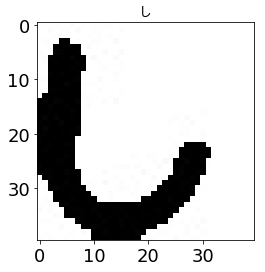

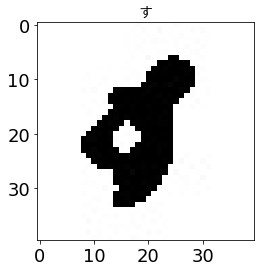

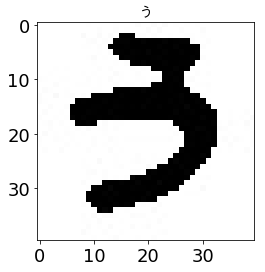

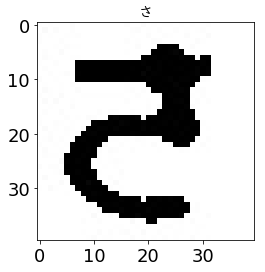

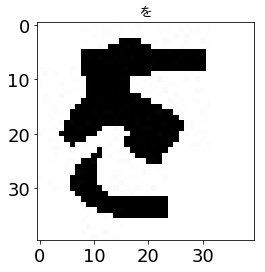

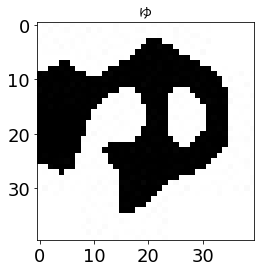

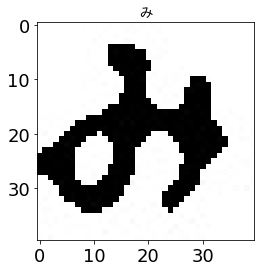

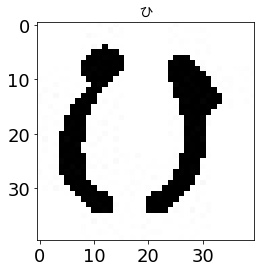

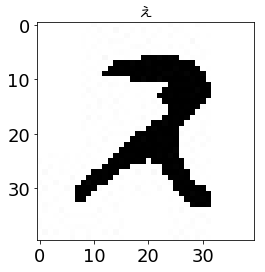

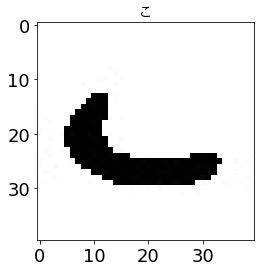

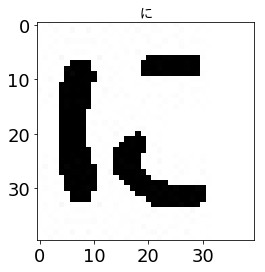

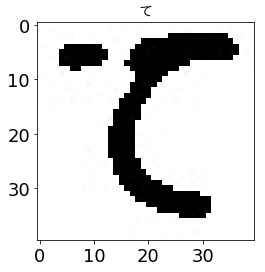

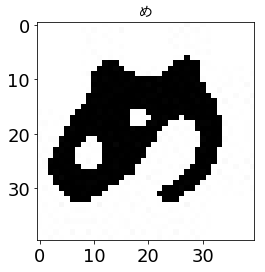

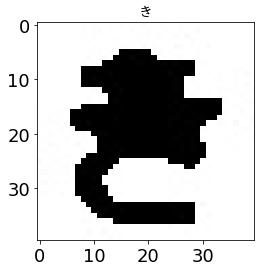

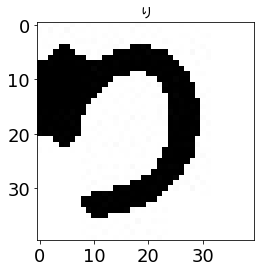

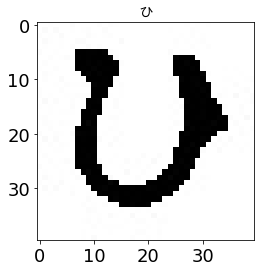

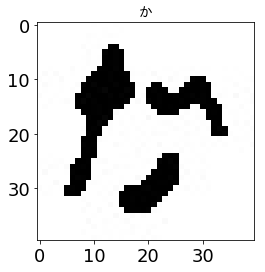

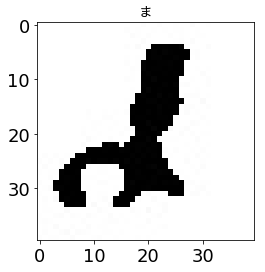

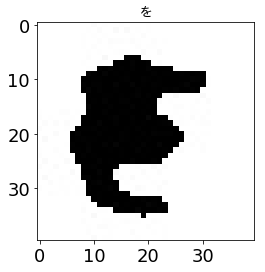

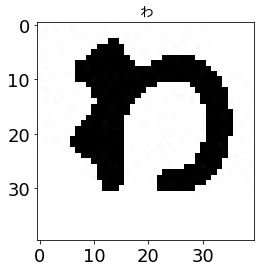

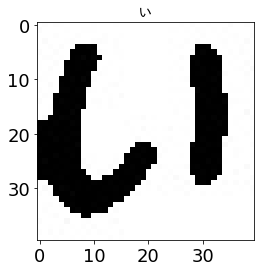

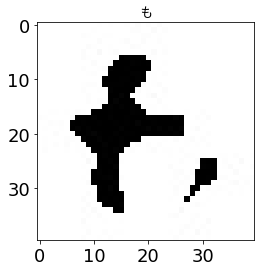

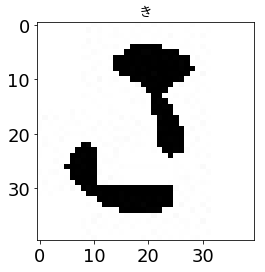

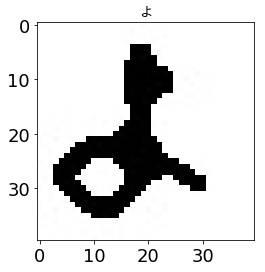

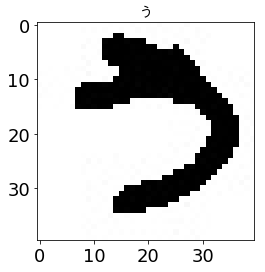

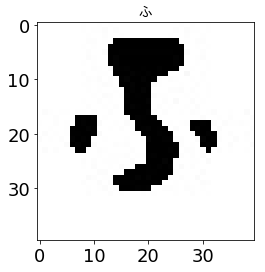

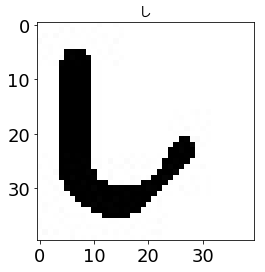

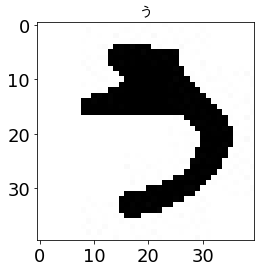

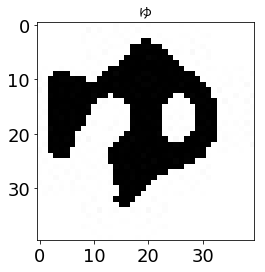

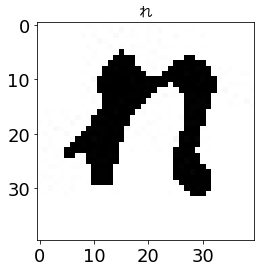

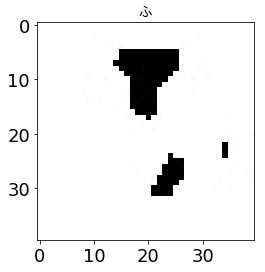

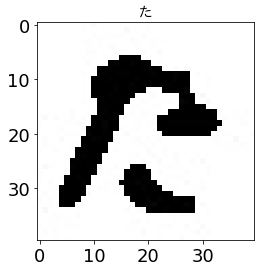

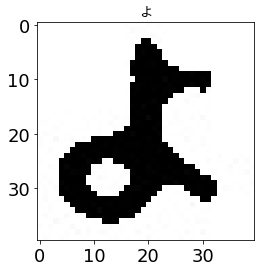

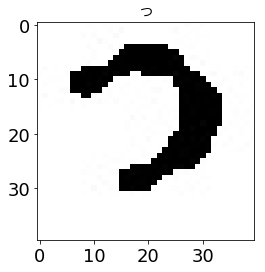

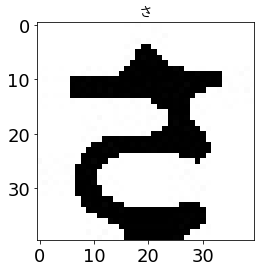

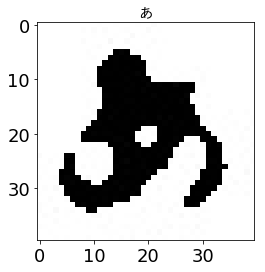

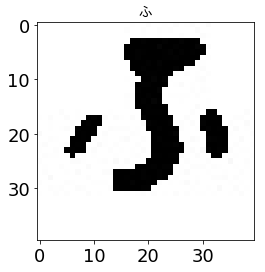

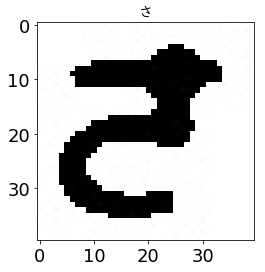

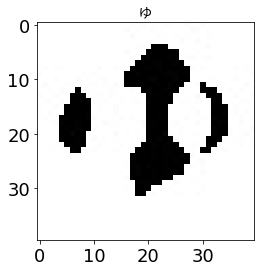

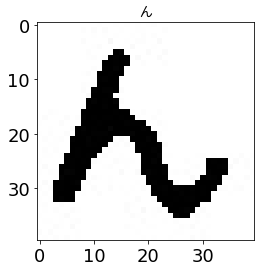

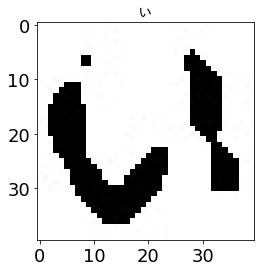

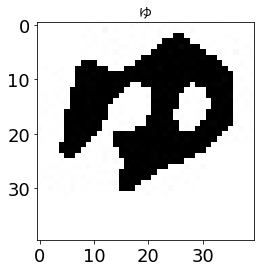

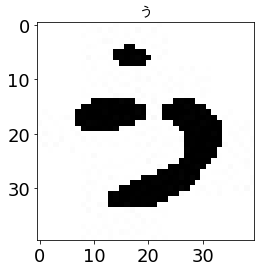

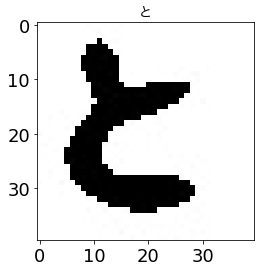

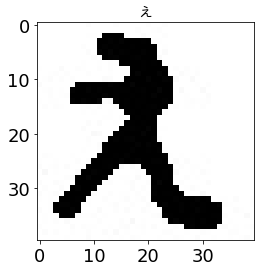

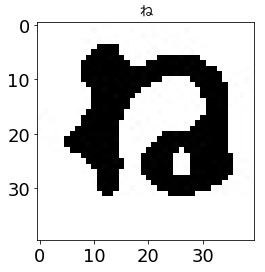

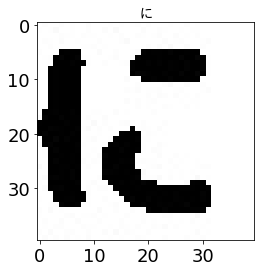

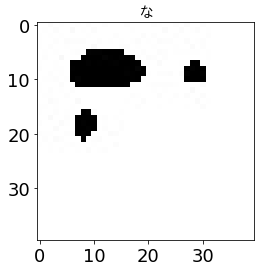

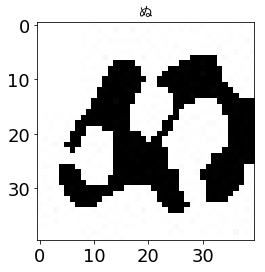

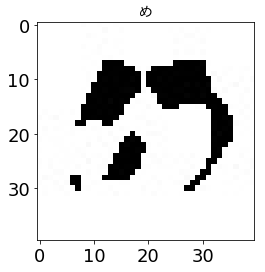

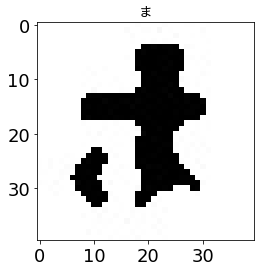

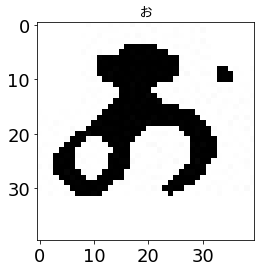

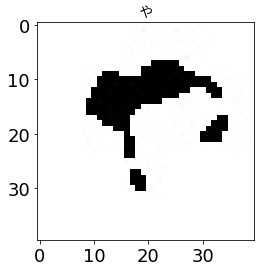

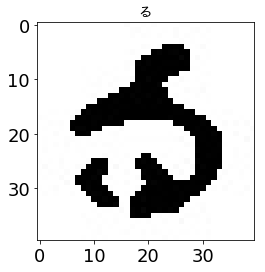

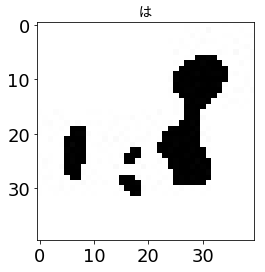

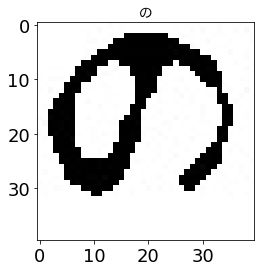

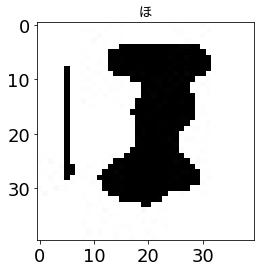

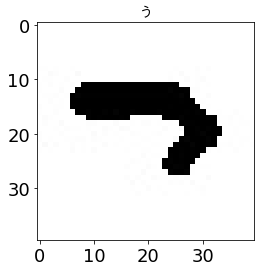

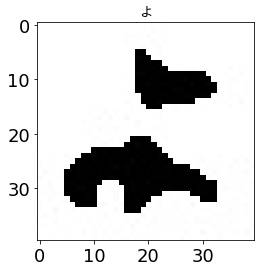

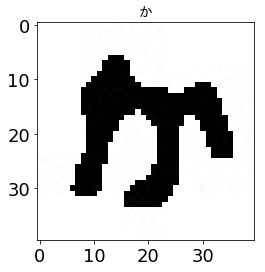

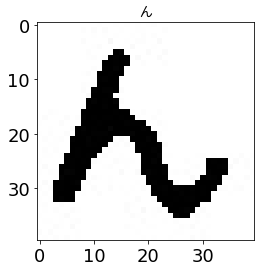

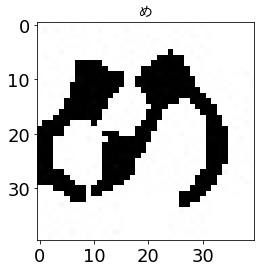

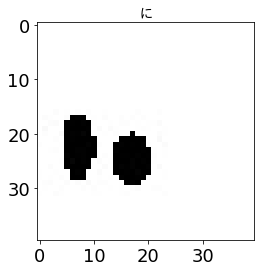

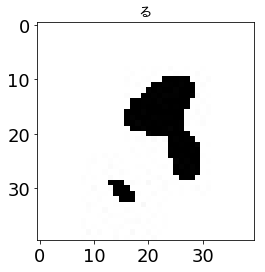

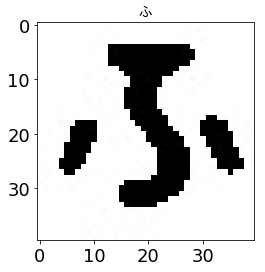

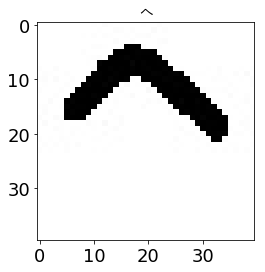

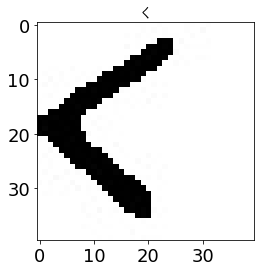

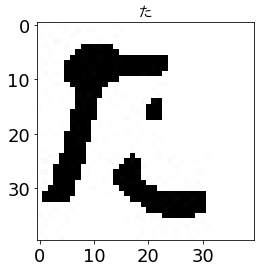

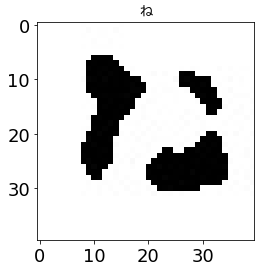

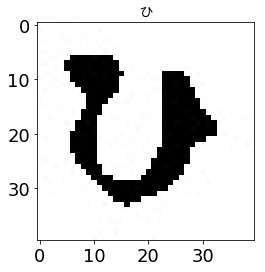

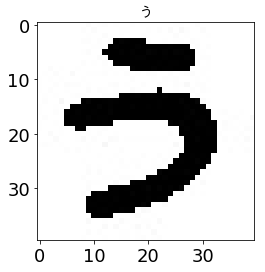

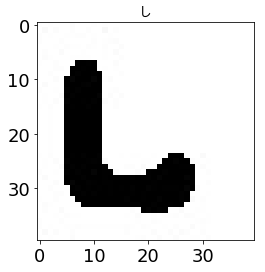

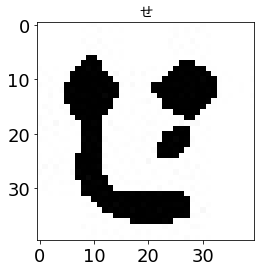

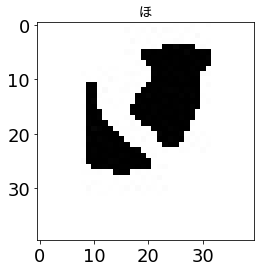

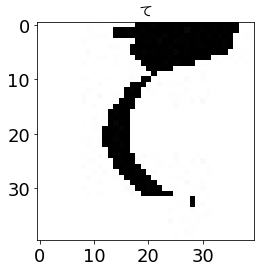

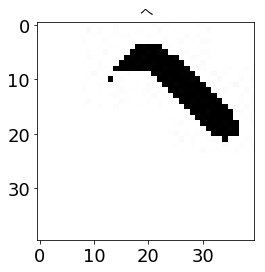

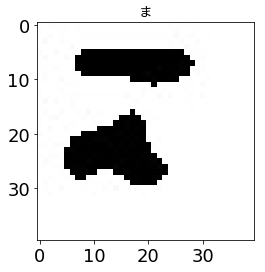

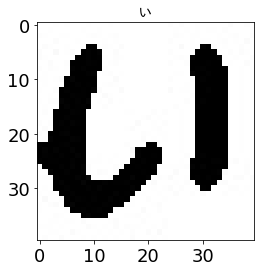

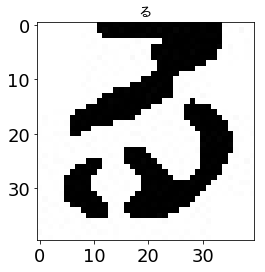

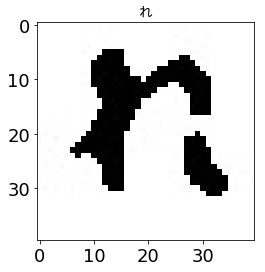

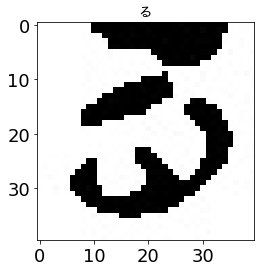

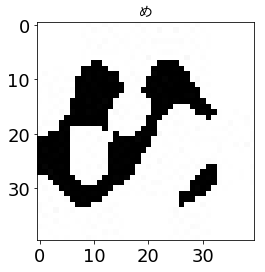

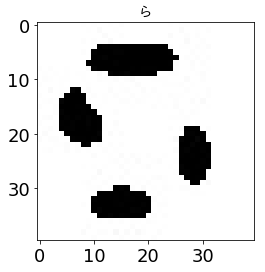

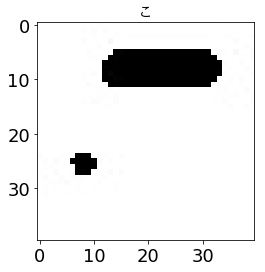

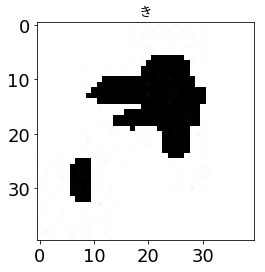

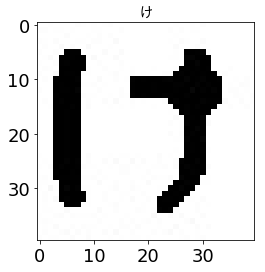

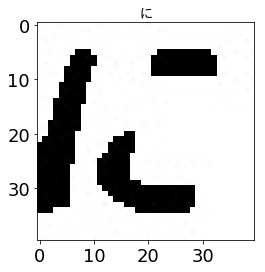

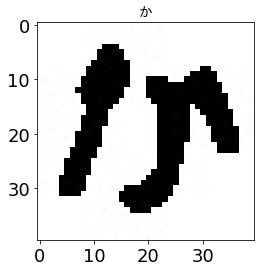

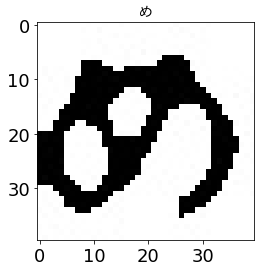

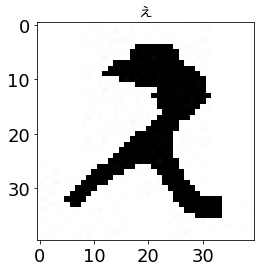

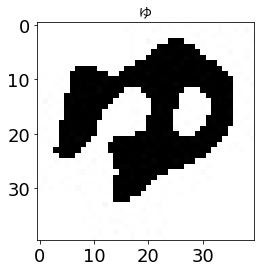

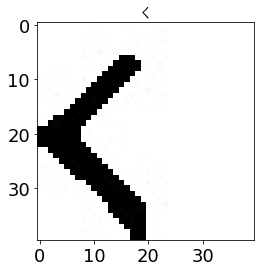

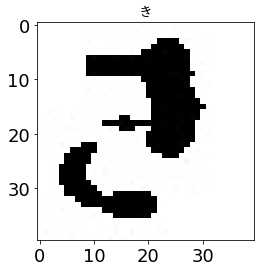

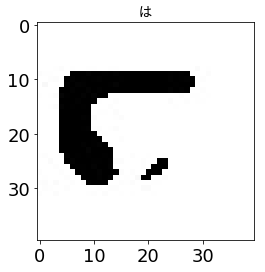

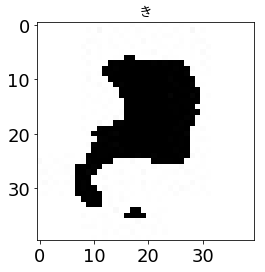

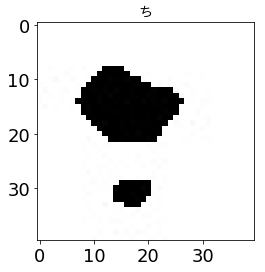

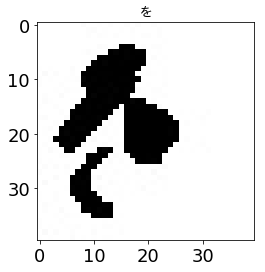

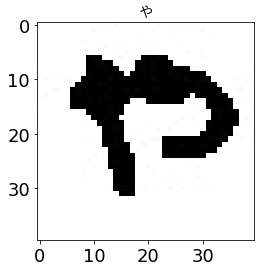

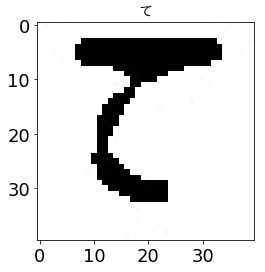

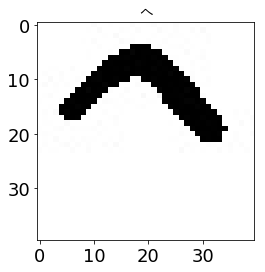

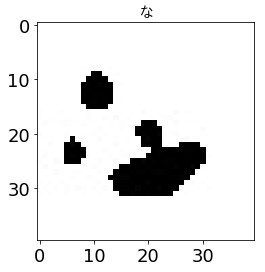

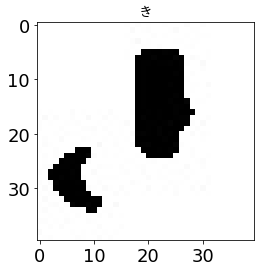

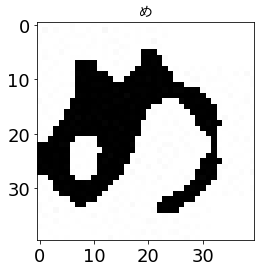

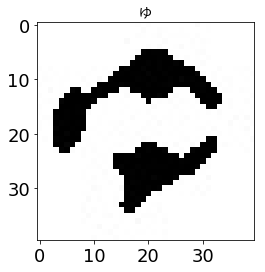

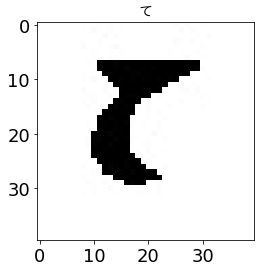

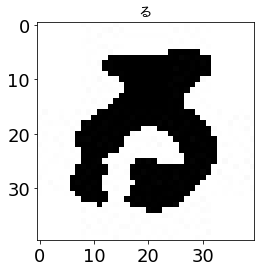

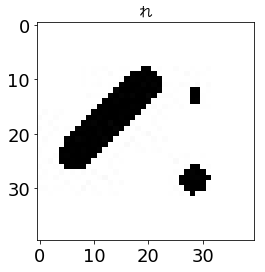

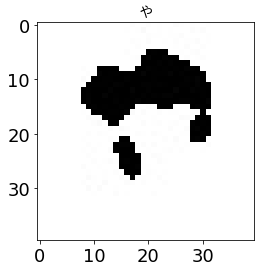

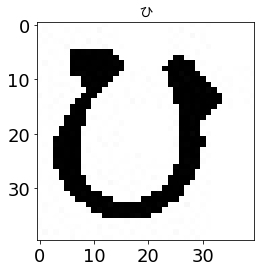

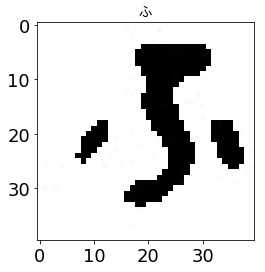

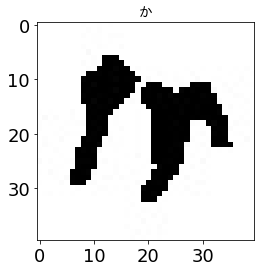

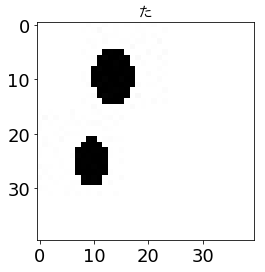

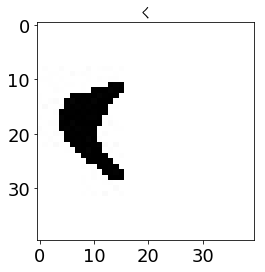

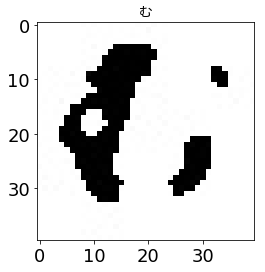

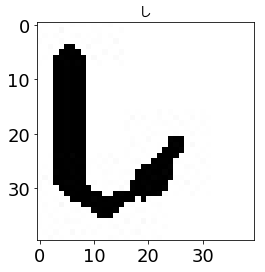

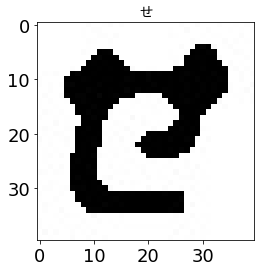

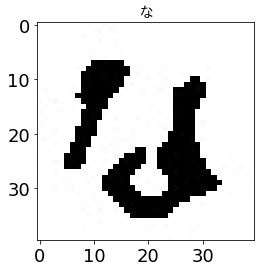

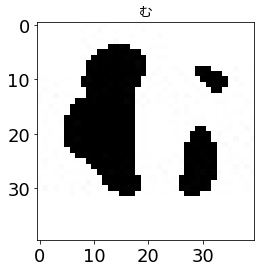

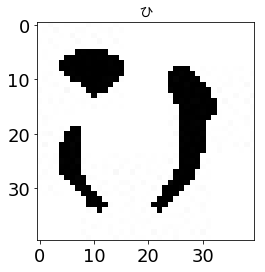

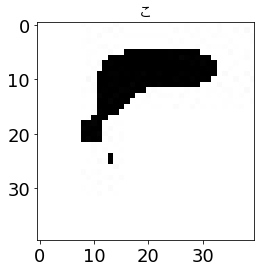

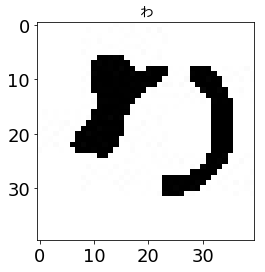

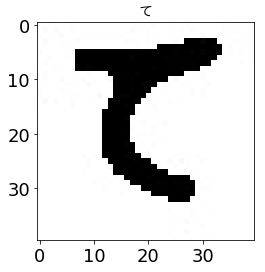

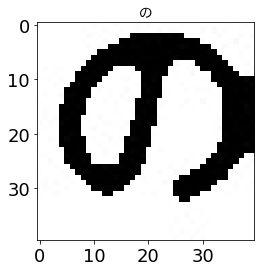

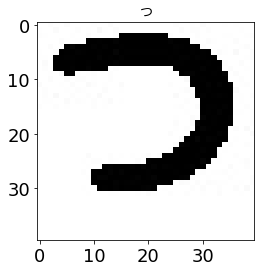

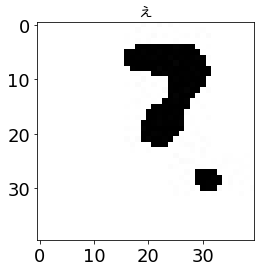

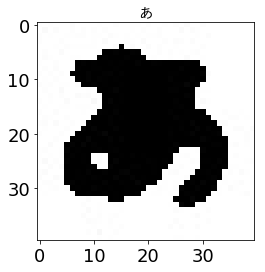

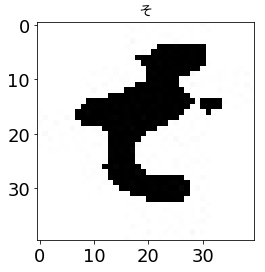

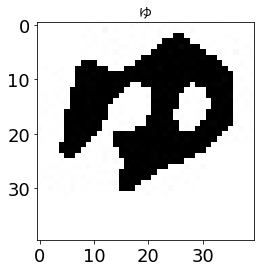

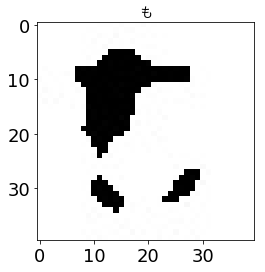

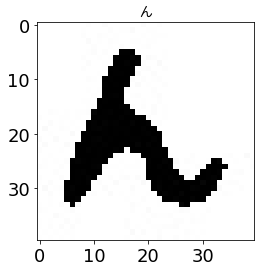

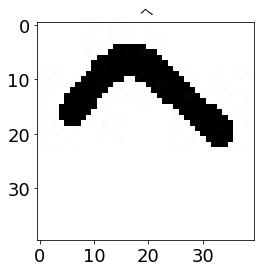

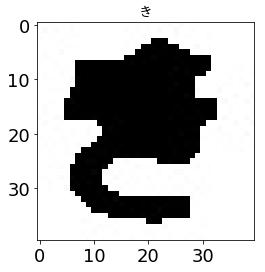

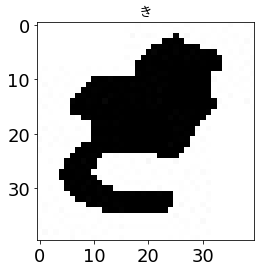

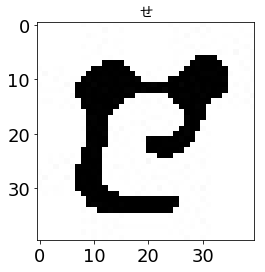

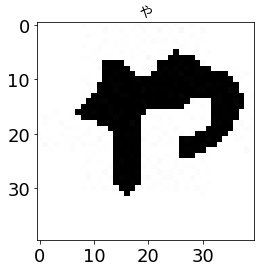

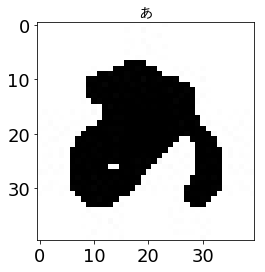

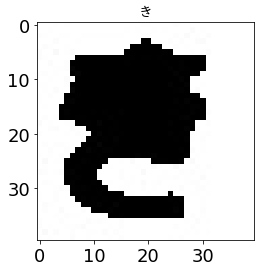

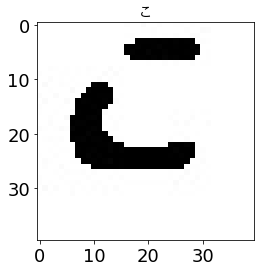

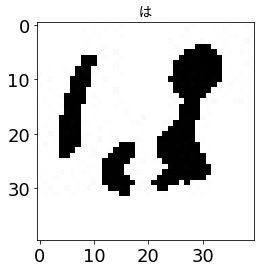

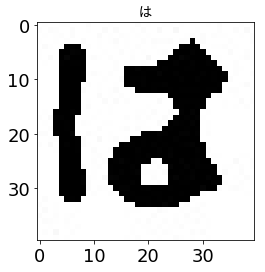

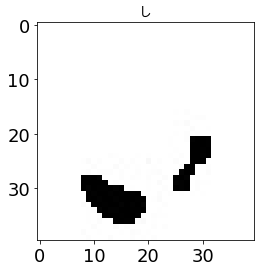

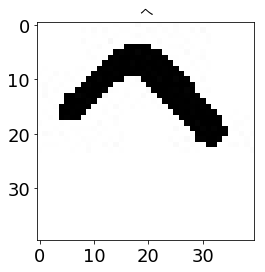

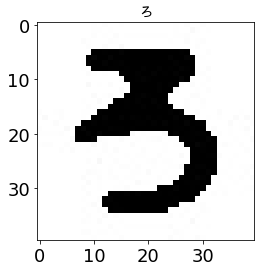

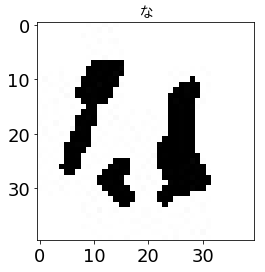

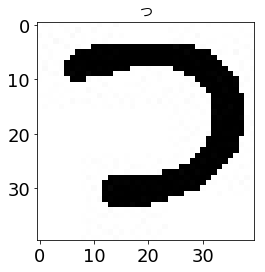

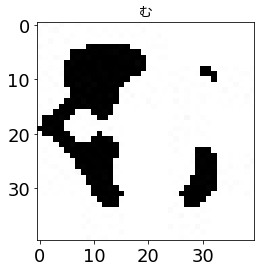

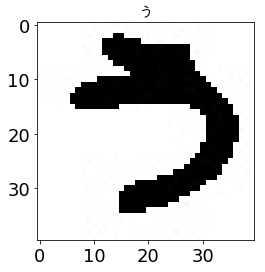

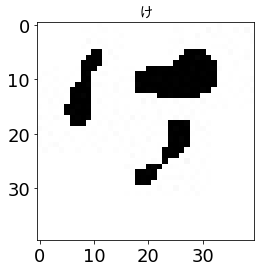

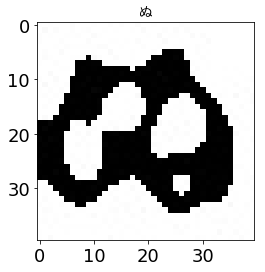

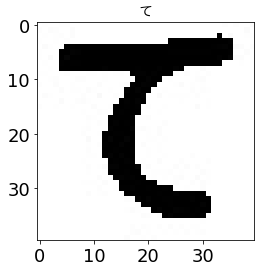

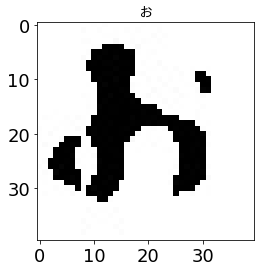

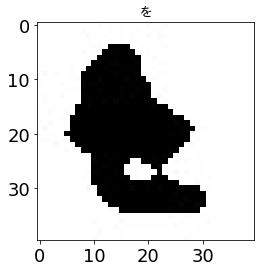

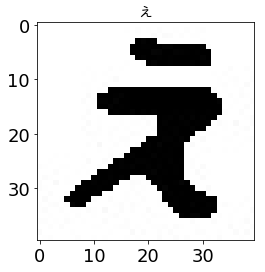

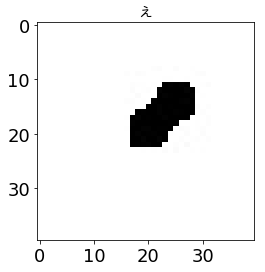

In [34]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf', size=14)

n=0
for i,l in zip(correct_img,correct_label):
    if n%50==0:
    #if l==20:    
        i=np.reshape( i,(40,40) )
        plt.figure( figsize=(4,4) )
        plt.gray()
        plt.title( dic[l],fontproperties=fp )
        plt.imshow(i)
    n+=1

# グラフの作成

c=  Counter({22: 373, 7: 360, 3: 357, 19: 352, 41: 350, 10: 348, 45: 347, 15: 344, 42: 342, 5: 341, 17: 341, 34: 340, 18: 340, 4: 339, 31: 339, 24: 339, 25: 338, 23: 338, 37: 338, 43: 337, 35: 335, 32: 334, 36: 333, 14: 331, 44: 330, 6: 329, 16: 327, 38: 326, 40: 326, 26: 325, 0: 325, 30: 324, 27: 323, 39: 323, 8: 323, 1: 323, 13: 323, 33: 316, 9: 316, 11: 311, 28: 311, 2: 309, 12: 307, 20: 307, 29: 303, 21: 301})
keys= dict_keys([27, 10, 26, 42, 34, 39, 21, 11, 25, 8, 32, 41, 23, 3, 4, 30, 38, 31, 24, 2, 0, 12, 19, 37, 33, 45, 5, 29, 1, 15, 18, 16, 7, 43, 36, 28, 40, 13, 22, 14, 17, 6, 44, 9, 20, 35])
keys= ['め', 'な', 'ふ', 'り', 'そ', 'ね', 'ろ', 'さ', 'ぬ', 'た', 'を', 'し', 'け', 'つ', 'き', 'み', 'も', 'ち', 'ひ', 'て', 'へ', 'や', 'ゆ', 'の', 'れ', 'ん', 'よ', 'え', 'ま', 'せ', 'ほ', 'す', 'い', 'に', 'か', 'る', 'ら', 'く', 'は', 'わ', 'う', 'む', 'と', 'こ', 'あ', 'お']
val= dict_values([323, 348, 325, 342, 340, 323, 301, 311, 338, 323, 334, 350, 338, 357, 339, 324, 326, 339, 339, 309, 325, 307, 352, 338, 316, 347, 341, 

([<matplotlib.axis.XTick at 0x7f89aa0746a0>,
 <a list of 46 Text xticklabel objects>)

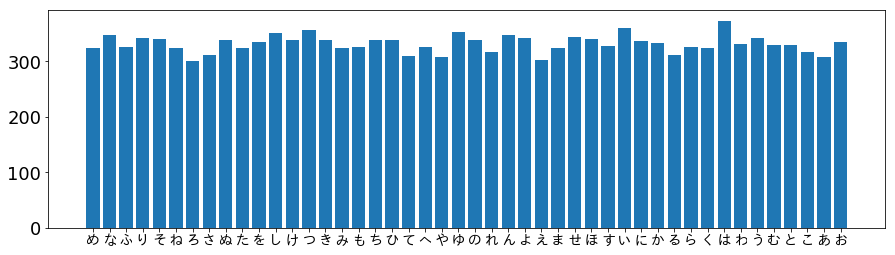

In [35]:
c= collections.Counter( correct_label )
print( "c= ",c )

keys= c.keys()
print("keys=",keys)
keys=list(keys)
for i in range( len(keys) ):
    keys[i]=dic[ keys[i] ]
print("keys=",keys)    


val= c.values()
print("val=",val)


plt.figure(figsize=(15, 4) )
plt.bar(keys, val, align="center" )
plt.xticks(keys, fontproperties=fp)

# preprocessing input image

['img/cliped_img2/あ/IMG_2312 (1).jpg']
(21, 21, 3)
h,w= 21 21
[253, 254, 254, 254, 255, 254, 254, 254, 255, 249, 255, 245, 251, 254, 255, 251, 255, 255, 255, 255, 255, 253, 254, 254, 251, 255, 250, 255, 255, 254, 253, 253, 248, 254, 249, 254, 251, 255, 255, 255, 255, 255, 255, 255, 255, 254, 254, 254, 253, 253, 255, 255, 253, 253, 253, 252, 254, 253, 255, 254, 253, 253, 255, 255, 254, 254, 253, 253, 253, 251, 250, 254, 251, 251, 248, 253, 255, 252, 253, 252, 252, 253, 254, 255]
min_edg= 240
[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255]
 [255 255 255 255 255 255 255 255 222 163 255 255 255 255 255 255 255 255
  255 255 255]
 [255 255 255 255 255 255 255 255 166 113 207 208 212 217 255 255 255 255
  255 255 255]
 [255 255 255 255 255 226 190 162 110 118 176 176 176 199 2

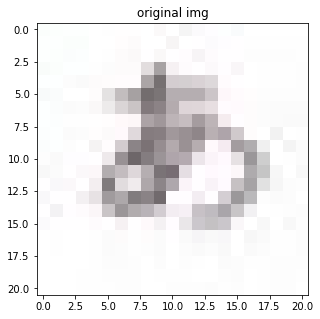

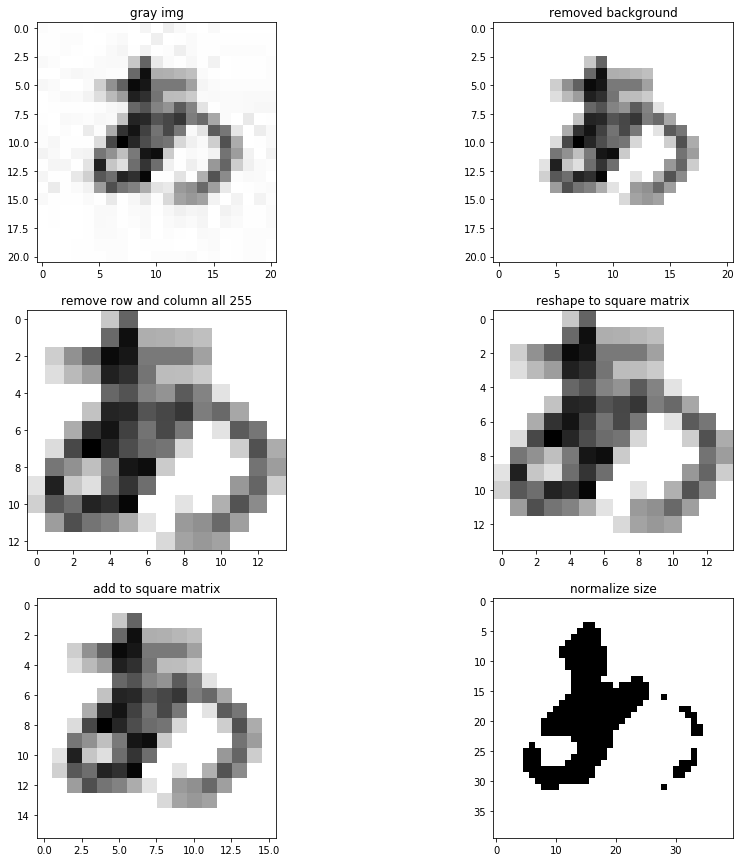

In [13]:
import glob
import cv2

target_dir= 'img/cliped_img2/あ/*'# 文字種選択
cliped_img_list= glob.glob(target_dir)
print(cliped_img_list)

img= cv2.imread(cliped_img_list[0] )# 使用写真変更
#img= cv2.cvtColor( img, cv2.COLOR_BGR2RGB )
plt.figure(figsize=(5,5))
plt.title("original img")
plt.imshow(img)

print(img.shape)

plt.figure(figsize=(15,15) )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#---------------------<convert to gray>
#gray = cv2.cvtColor(img, 0)    
plt.gray()
plt.subplot(321)
plt.title("gray img")
plt.imshow(gray)
cv2.imwrite('img/gray.jpg',gray)

h,w= gray.shape
print( 'h,w=',h,w )

#------------------外周のガゾの最小値以上の画素値を全て255にする
edg_lis= gray[0].flatten().tolist()
edg_lis.extend(gray[:,0:1].flatten().tolist() )
edg_lis.extend(gray[h-1:h,:].flatten().tolist() )
edg_lis.extend(gray[:,w-1:w].flatten().tolist() )
print(edg_lis)
min_edg= min(edg_lis)-5
print('min_edg=',min_edg)
gray[gray>=min_edg]=255#  (255-min_edg)を全体に足す？

plt.subplot(322)
plt.imshow(gray)
plt.title("removed background")
cv2.imwrite('img/gray2.jpg',gray)
print(gray)

#---------------------------いらない行、列を削除
#print('gray=',gray)
gray= gray[:, ~np.all(gray==255, axis=0)]# ok
#print('gray=',gray)
gray= gray.T
gray= gray[:, ~np.all(gray==255, axis=0)]# ok
gray= gray.T

plt.subplot(323)
plt.imshow(gray)
plt.title("remove row and column all 255")
cv2.imwrite('img/gray2.jpg',gray)
print(gray)
#--------------------------正方行列にする
h,w= gray.shape
print( 'h,w=',h,w )
for i in range( abs(h-w) ):
    if h>w:
        gray= np.insert( gray,w,255, axis=1)
    elif w>h:
        gray= np.insert( gray,h,255, axis=0 )
#new = np.delete(data, 0, 1)
        
plt.subplot(324)
plt.title("reshape to square matrix")
plt.imshow(gray)
cv2.imwrite('img/gray3.jpg',gray)


# ------------------------------外周に一列づつ足す
h,w= gray.shape
gray= np.insert( gray,0,255,axis=1 )
gray= np.insert( gray,0,255,axis=0 )
gray= np.insert( gray,h+1,255,axis=1 )
gray= np.insert( gray,w+1,255,axis=0 )

plt.subplot(325)
plt.title("add to square matrix")
plt.imshow(gray)
cv2.imwrite('img/gray4.jpg',gray)

#--------------------------------------------正規化
#    cv2.INTER_NEAREST 最近傍補間
#    cv2.INTER_LINEAR バイリニア補間（デフォルト）
#    cv2.INTER_AREA 平均画素法
#    cv2.INTER_CUBIC 4×4 の近傍領域を利用するバイキュービック補間
#    cv2.INTER_LANCZOS4 8×8 の近傍領域を利用する Lanczos法の補間
gray= cv2.resize( gray, (40,40) )# ------------------------------正規化サイズ

# ----------- 階調方向に正規化
ret= cv2.normalize( gray,gray,alpha=0,beta=255,norm_type=cv2.NORM_MINMAX )
print("gray5=",gray)

#二値化
ret, gray = cv2.threshold(ret, 110, 255, cv2.THRESH_BINARY)

plt.subplot(326)
plt.title("normalize size")
plt.imshow(gray)
cv2.imwrite('img/gray5.jpg',gray)


# 教師データとかなり乖離しているが、これでよそくできるのか？
# 教師データが薄いので、入力画像を薄くする？
# 外周の一番低い値分全体に足す？

# cilabに画像で渡すと、なぜか値が変わる→　flattenしてnpとして渡す
flat= gray.flatten()
print("flat= ",flat)
np.save("flat_input.npy",flat)

# テストデータを入力にしたら?

cor_img.shape= (40, 40)
cor_lab= 10

x.shape=  (1600,)
class= [32]
proba=  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


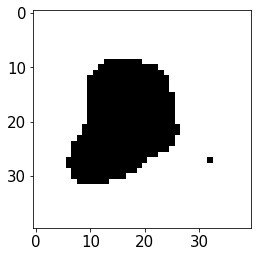

In [52]:
NN=1
cor_img= correct_img[NN]
cor_lab= correct_label[NN]
#cor_img= gray

print("cor_img.shape=",cor_img.shape)
print("cor_lab=",cor_lab)

cor_show= cor_img.reshape((40,40))
plt.imshow(cor_show)


print()
container=np.zeros( [0,1600] )
x= np.ravel(cor_img)# -------------------------------------上の preprecessing の gray を入力とする
print("x.shape= ", x.shape)

container= np.insert( container, len(container), x, axis=0 )

#上で作成して保存して、ロードしたモデル
features = model.predict_classes(container, batch_size=32)
print("class=",features)
#print(np.argmax(features))
proba= model.predict_proba(container)
print("proba= ",proba)


# 平仮名の辞書作成

In [4]:
import os
import cv2

Dir= "img/font_hiragana/"
hiragana_lis= os.listdir(Dir)
#print(hiragana_lis)

n_lis= range(46)
#print(n_lis)

dic= dict( zip(n_lis,hiragana_lis) )
print(dic)

{0: 'へ', 1: 'ま', 2: 'て', 3: 'つ', 4: 'き', 5: 'よ', 6: 'む', 7: 'い', 8: 'た', 9: 'こ', 10: 'な', 11: 'さ', 12: 'や', 13: 'く', 14: 'わ', 15: 'せ', 16: 'す', 17: 'う', 18: 'ほ', 19: 'ゆ', 20: 'あ', 21: 'ろ', 22: 'は', 23: 'け', 24: 'ひ', 25: 'ぬ', 26: 'ふ', 27: 'め', 28: 'る', 29: 'え', 30: 'み', 31: 'ち', 32: 'を', 33: 'れ', 34: 'そ', 35: 'お', 36: 'か', 37: 'の', 38: 'も', 39: 'ね', 40: 'ら', 41: 'し', 42: 'り', 43: 'に', 44: 'と', 45: 'ん'}


#  一枚入力して予測したい
https://qiita.com/supersaiakujin/items/b9c9da9497c2163d5a74

In [54]:
import cv2
import os
from keras.models import model_from_json

json_name= "OCR_photo.json"
json_string = open( json_name ).read()
Model = model_from_json(json_string)

Model.summary()

weight_name= 'OCR_photo.hdf5'
Model.load_weights( weight_name )


#-------------------------------------------------------------------------------------------


container=np.zeros( [0,1600] )
x= np.ravel(gray)# -------------------------------------上の preprecessing の gray を入力とする
print("x.shape= ", x.shape)

container= np.insert( container, len(container), x, axis=0 )


#上で作成して保存して、ロードしたモデル
features = Model.predict_classes(container, batch_size=32)
print("class=",features)
#print(np.argmax(features))
proba= Model.predict_proba(container)
print("proba= ",proba)

#上でできたモデル
features = model.predict_classes(container, batch_size=32)
print("class=",int(features))
#print(np.argmax(features))
proba= model.predict_proba(container)
print("proba= ",proba)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               819712    
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 46)                23598     
__________

# predict clipped img

In [2]:
def preprocess_input(original_img_dir):
    img= cv2.imread(original_img_dir)
    img= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    h,w=img.shape
    
    # 背景削除
    edg_lis= img[0].flatten().tolist()
    edg_lis.extend(img[:,0:1].flatten().tolist() )
    edg_lis.extend(img[h-1:h,:].flatten().tolist() )
    edg_lis.extend(img[:,w-1:w].flatten().tolist() )
    min_edg= min(edg_lis)-7
    img[img>=min_edg]=255
    
    # 要らない行列削除
    img= img[:, ~np.all(img==255, axis=0)]# ok
    img= img.T
    img= img[:, ~np.all(img==255, axis=0)]# ok
    img= img.T
    # 正方行列化
    h,w= img.shape
    for i in range( abs(h-w) ):
        if h>w:
            img= np.insert( img,w,255, axis=1)
        elif w>h:
            img= np.insert( img,h,255, axis=0 )
    # 外周追加
    h,w= img.shape
    img= np.insert( img,0,255,axis=1 )
    img= np.insert( img,0,255,axis=0 )
    img= np.insert( img,h+1,255,axis=1 )
    img= np.insert( img,w+1,255,axis=0 )
    # 正規化
    img= cv2.resize( img,(40,40) )
    # 平滑化
    kernel = np.ones((3,3),np.float32)/9
    img = cv2.filter2D(img,-1,kernel)
    # 階調方向に正規化
    processed_img= cv2.normalize( img,img,alpha=0,beta=255,norm_type=cv2.NORM_MINMAX  )
    #二値化
    ret, processed_img = cv2.threshold(processed_img, 110, 255, cv2.THRESH_BINARY)
    
    return processed_img

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               819712    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 46)                23598     
__________

/home/sugawaramisaki/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


correct class= 41
predict class= [41]
proba=  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

り
['IMG_2312 (38).jpg']
IMG_2312 (38).jpg
correct class= 42
predict class= [40]
proba=  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

に
['IMG_2312 (20).jpg']
IMG_2312 (20).jpg
correct class= 43
predict class= [41]
proba=  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]

と
['IMG_2312 (18).jpg']
IMG_2312 (18).jpg
correct class= 44
predict class= [45]
proba=  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

ん
['IMG_2312 (44).jpg']
IMG_2312 (44).jpg
correct class= 45
predict class= [45]
proba=  [[0. 0. 0. 0. 0. 0. 0.

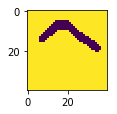

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

sum= 29
correct_lis= [0, 1, 2, 5, 6, 9, 10, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 29, 30, 31, 32, 34, 36, 37, 39, 40, 41, 45]


In [6]:
import cv2
import os
from keras.models import model_from_json

#json_name= "OCR_photo.json"
#json_string = open( json_name ).read()
#Model = model_from_json(json_string)
#Model.summary()
#weight_name= 'OCR_photo.hdf5'
#Model.load_weights( weight_name )

#json_name= "OCR_photo1.json"
json_name= "OCR_photo_niti.json"
json_string = open( json_name ).read()
Model = model_from_json(json_string)
Model.summary()
weight_name= 'OCR_photo_niti.hdf5'
Model.load_weights( weight_name )


N=1
Dir= "img/cliped_img2/"
target_class=0
correct_lis=[]
sum=0
for i in hiragana_lis:
    print(i)
    Dir=Dir+i
    cliped_lis= os.listdir(Dir)
    print(cliped_lis)
    for n in cliped_lis:
        print(n)
        processed_img= preprocess_input( Dir+"/"+n )
        
        plt.figure( figsize=(5,5) )
        if N==1:
            print("processed_img_shape=",processed_img.shape)
            #print("processed_img=",processed_img)
            plt.subplot(3,1,2)
            plt.imshow(processed_img)
        N+=1
        
        container=np.zeros( [0,1600] )
        x= np.ravel( processed_img )# -----------------上の preprecessing の gray を入力とする
        container= np.insert( container, len(container), x, axis=0 )
        features = Model.predict_classes(container, batch_size=32)
        print("correct class=",target_class)
        print("predict class=",features)
        proba= Model.predict_proba(container)
        print("proba= ",proba)
        print()
        
        if target_class==int(features):
            sum+=1
            correct_lis.append(int(features) )
    Dir= "img/cliped_img2/"
    target_class+=1
plt.show()
print("sum=",sum)
print("correct_lis=",correct_lis )


[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]=[17,18,18,25,25,27,30,31,29,27,28,27,27,27,28,29,29,27,28,27,28,28]

二値化しない

[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]=[20,23,20,24,22,22,21,22,23,22,23,22,20,20,20,21,23,23,22,21,21]



# confirm processed input img

へ
['IMG_2312 (27).jpg']
img/cliped_img2/へ/IMG_2312 (27).jpg


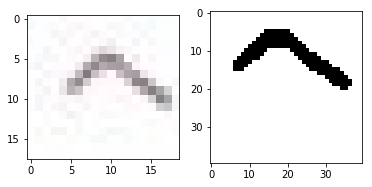

ま
['IMG_2312 (29).jpg']
img/cliped_img2/ま/IMG_2312 (29).jpg


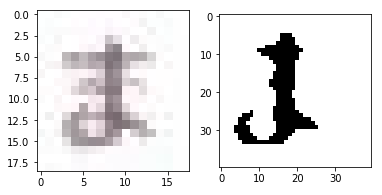

て
['IMG_2312 (17).jpg']
img/cliped_img2/て/IMG_2312 (17).jpg


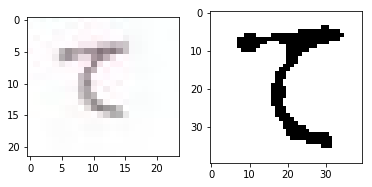

つ
['IMG_2312 (16).jpg']
img/cliped_img2/つ/IMG_2312 (16).jpg


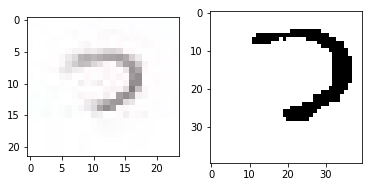

き
['IMG_2312 (4).jpg']
img/cliped_img2/き/IMG_2312 (4).jpg


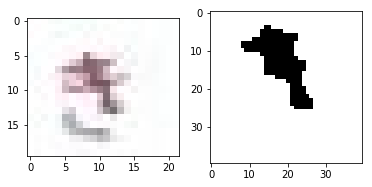

よ
['IMG_2312 (36).jpg']
img/cliped_img2/よ/IMG_2312 (36).jpg


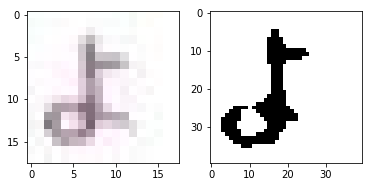

む
['IMG_2312 (31).jpg']
img/cliped_img2/む/IMG_2312 (31).jpg


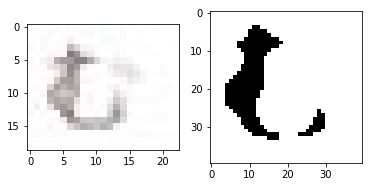

い
['IMG_2312 (1).jpg']
img/cliped_img2/い/IMG_2312 (1).jpg


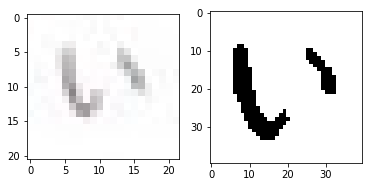

た
['IMG_2312 (14).jpg']
img/cliped_img2/た/IMG_2312 (14).jpg


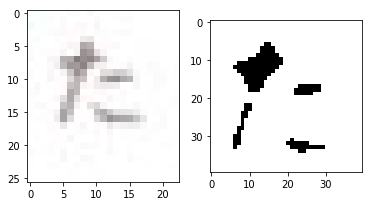

こ
['IMG_2312 (7).jpg']
img/cliped_img2/こ/IMG_2312 (7).jpg


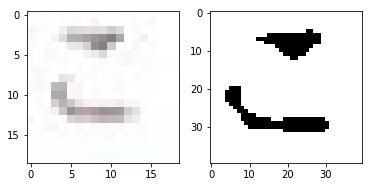

な
['IMG_2312 (19).jpg']
img/cliped_img2/な/IMG_2312 (19).jpg


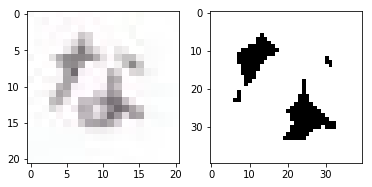

さ
['IMG_2312 (8).jpg']
img/cliped_img2/さ/IMG_2312 (8).jpg


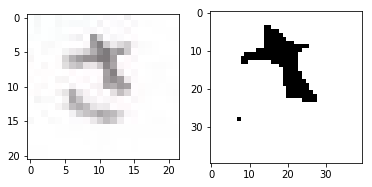

や
['IMG_2312 (34).jpg']
img/cliped_img2/や/IMG_2312 (34).jpg


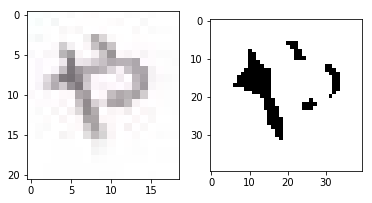

く
['IMG_2312 (5).jpg']
img/cliped_img2/く/IMG_2312 (5).jpg


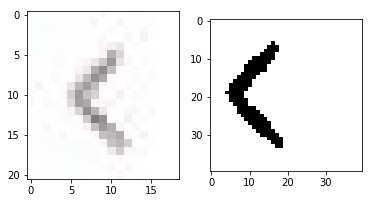

わ
['IMG_2312 (42).jpg']
img/cliped_img2/わ/IMG_2312 (42).jpg


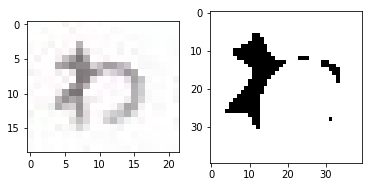

せ
['IMG_2312 (12).jpg']
img/cliped_img2/せ/IMG_2312 (12).jpg


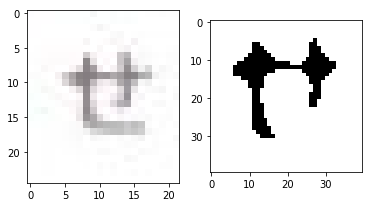

す
['IMG_2312 (10).jpg']
img/cliped_img2/す/IMG_2312 (10).jpg


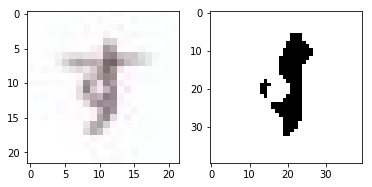

う
['IMG_2312 (1).jpg']
img/cliped_img2/う/IMG_2312 (1).jpg


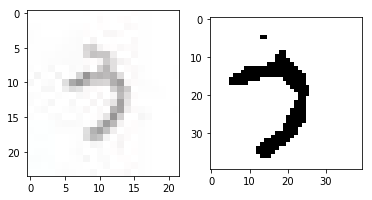

ほ
['IMG_2312 (28).jpg']
img/cliped_img2/ほ/IMG_2312 (28).jpg


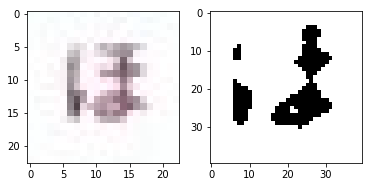

ゆ
['IMG_2312 (35).jpg']
img/cliped_img2/ゆ/IMG_2312 (35).jpg


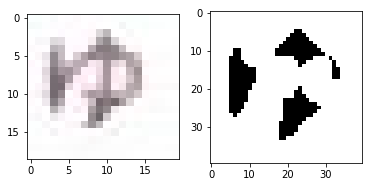

あ
['IMG_2312 (1).jpg']
img/cliped_img2/あ/IMG_2312 (1).jpg


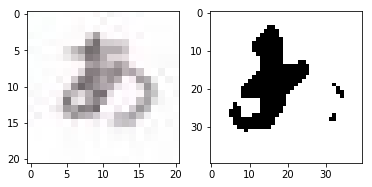

ろ
['IMG_2312 (41).jpg']
img/cliped_img2/ろ/IMG_2312 (41).jpg


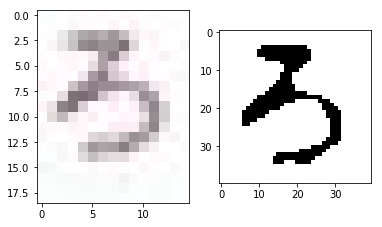

は
['IMG_2312 (24).jpg']
img/cliped_img2/は/IMG_2312 (24).jpg


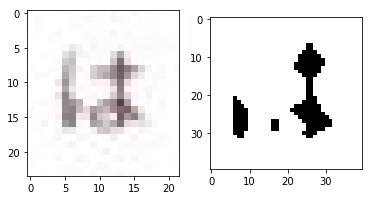

け
['IMG_2312 (6).jpg']
img/cliped_img2/け/IMG_2312 (6).jpg


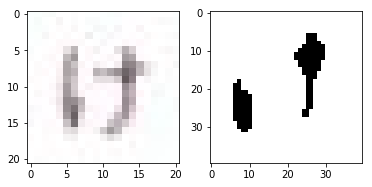

ひ
['IMG_2312 (25).jpg']
img/cliped_img2/ひ/IMG_2312 (25).jpg


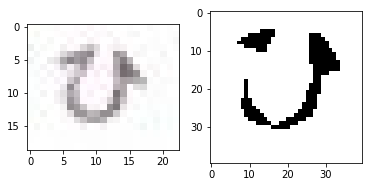

ぬ
['IMG_2312 (21).jpg']
img/cliped_img2/ぬ/IMG_2312 (21).jpg


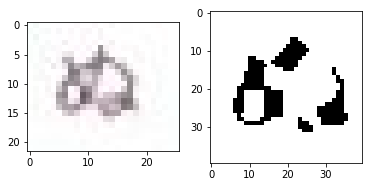

ふ
['IMG_2312 (26).jpg']
img/cliped_img2/ふ/IMG_2312 (26).jpg


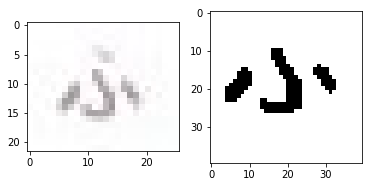

め
['IMG_2312 (32).jpg']
img/cliped_img2/め/IMG_2312 (32).jpg


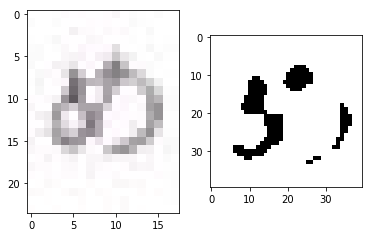

る
['IMG_2312 (39).jpg']
img/cliped_img2/る/IMG_2312 (39).jpg


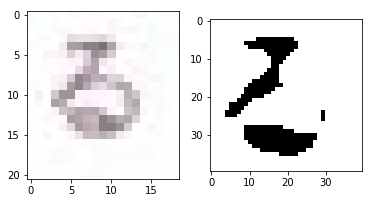

え
['IMG_2312 (1).jpg']
img/cliped_img2/え/IMG_2312 (1).jpg


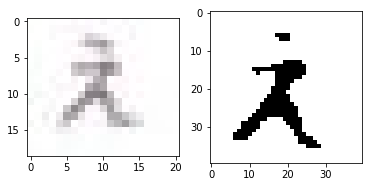

み
['IMG_2312 (30).jpg']
img/cliped_img2/み/IMG_2312 (30).jpg


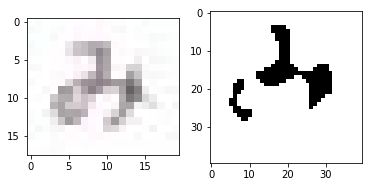

ち
['IMG_2312 (15).jpg']
img/cliped_img2/ち/IMG_2312 (15).jpg


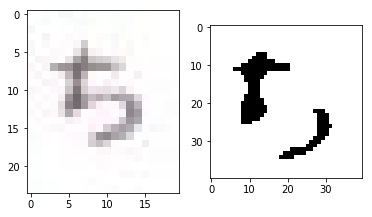

を
['IMG_2312 (43).jpg']
img/cliped_img2/を/IMG_2312 (43).jpg


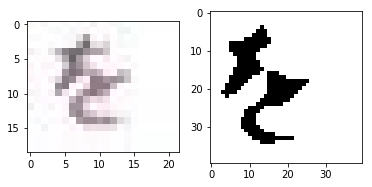

れ
['IMG_2312 (40).jpg']
img/cliped_img2/れ/IMG_2312 (40).jpg


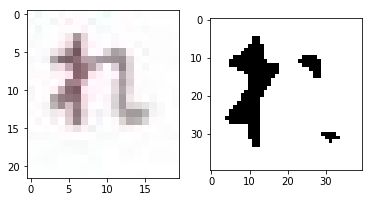

そ
['IMG_2312 (13).jpg']
img/cliped_img2/そ/IMG_2312 (13).jpg


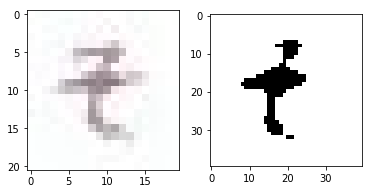

お
['IMG_2312 (2).jpg']
img/cliped_img2/お/IMG_2312 (2).jpg


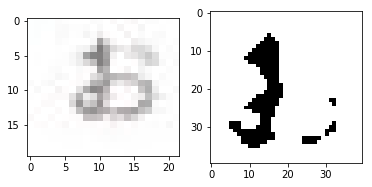

か
['IMG_2312 (3).jpg']
img/cliped_img2/か/IMG_2312 (3).jpg


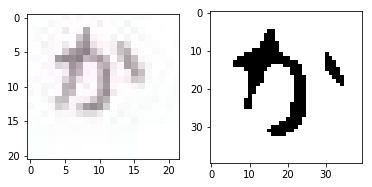

の
['IMG_2312 (23).jpg']
img/cliped_img2/の/IMG_2312 (23).jpg


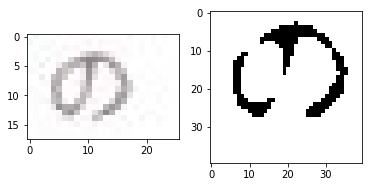

も
['IMG_2312 (33).jpg']
img/cliped_img2/も/IMG_2312 (33).jpg


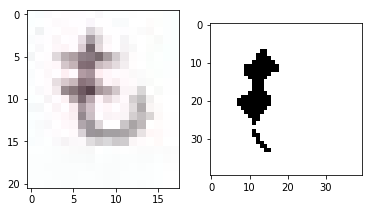

ね
['IMG_2312 (22).jpg']
img/cliped_img2/ね/IMG_2312 (22).jpg


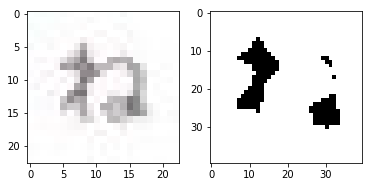

ら
['IMG_2312 (37).jpg']
img/cliped_img2/ら/IMG_2312 (37).jpg


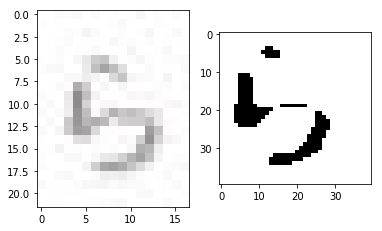

し
['IMG_2312 (9).jpg']
img/cliped_img2/し/IMG_2312 (9).jpg


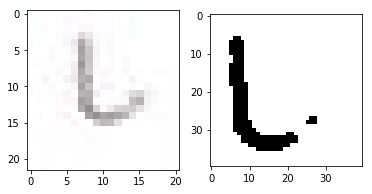

り
['IMG_2312 (38).jpg']
img/cliped_img2/り/IMG_2312 (38).jpg


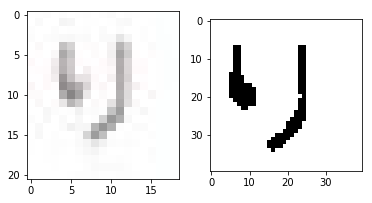

に
['IMG_2312 (20).jpg']
img/cliped_img2/に/IMG_2312 (20).jpg


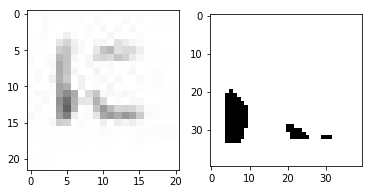

と
['IMG_2312 (18).jpg']
img/cliped_img2/と/IMG_2312 (18).jpg


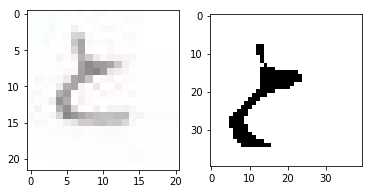

ん
['IMG_2312 (44).jpg']
img/cliped_img2/ん/IMG_2312 (44).jpg


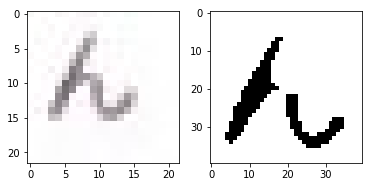

In [12]:
N=1
Dir1= "img/cliped_img2/"
#plt.figure(figsize=(100,100))
for i in hiragana_lis:
    print(i)
    Dir=Dir+i
    cliped_lis= os.listdir(Dir)
    print(cliped_lis)
    for n in cliped_lis:
        print(Dir+"/"+n)
        original= cv2.imread(Dir+"/"+n)
        processed_img= preprocess_input( Dir+"/"+n )
        
        plt.subplot(121)
        plt.imshow(original)
        plt.subplot(122)
        plt.imshow(processed_img)
        plt.show()
        
    Dir= "img/cliped_img2/"
#plt.show()

In [ ]:

"""15000枚位（20*20〜6*6）
あ→な、い→や、う→ち、え→さ、お→ら
か→と、き→そ、く→り、け→さ、こ→お
さ→を、し→な、す→を、せ→な、そ→そ☆
た→ふ、ち→む、つ→な、て→ろ、と→さ
な→な☆、に→ち、ぬ→な、ね→な、の→わ
は→み、ひ→り、ふ→な、へ→へ☆、ほ→な
ま→す、み→れ、む→ら、め→な、も→も☆
や→や☆、ゆ→そ、よ→よ☆、
ら→ち、り→ね、る→も、れ→へ、ろ→ふ
わ→ら、を→す、ん→も
6/46
"""
# https://fisproject.jp/2016/11/image-processing-with-opencv3/
